##  ARV Prediction System of Real Estate Properties
  Joseph Girsch
  <br/>
 (Patent Pending)




#### Goal: Estimate the After-Repair Value (ARV) of every property in the data set, regardless of its current condition. 

# Background Story and Introduction to Idea
Automated housing price estimate tools serve a vital role in the real estate industry. Realtors need to accurately estimate house values that support both buyers and sellers, banks depend on price estimates to calculate mortgage terms, and home buyers consult these independent estimates to assess the fairness of property list prices. But in an age of big data and prediction algorithms, these automated price estimate tools still fail to serve the needs of real estate investors, who operate on much tighter profit margins with significantly less room for errors. In particular, the lack of sufficient property condition data ultimately weakens the industry’s best automated pricing algorithms. The methodology below was designed specifically to predict the meet the needs of renovation investors. 

This project will show how it overcame this challenge of unreliable automated housing price estimates by using Natural Language Processing (NLP) techniques and a classification model to differentiate between renovated and non-renovated properties. The identified set of renovated properties will be used to train a regression model designed specifically to predict, not current value, but the After-Repair Value (ARV) of all properties in the data set, regardless of their current condition. 

In summary, the scripts in this repo will load real estate data from a CSV, call an API to obtain their census tracts, enhance a binary renovation classification model with NLP, and use a regression model to predict the ARV of each property. 







# Summary of Files in Repository
* Jupyter Note Book Files:
    * **ARV_Prediction_System.ipynb**: The primary jupyter notebook file that predicts the ARVs of the properly formatted real estate data. The code is divided into three main sections the ARV Prediction Code, the Model Evaluation Code, and Experimental Code. Only the ARV Prediction Code section is required to generate ARVs from real estate data. The Model Evaluation Code is useful to visualize the accuracy of the prediction models and test the impact of additional model tuning. The Experimental Code section is currently switched off but contains some ideas not fully implemented in the other two sections. The ARV_Prediction_System.ipynb file reads the required functions and Python package imports from the other two jupyter notebooks automatically.
    * **ARV_Functions_Constants.ipynb (Hidden)**: A secondary jupyter notebook file that stores most of the functions used in the ARV_Prediction_System. The functions in this file are automatically imported and does not need to be opened directly. However you may want to open this file to examine the descriptions and constructions of the functions it contains. **(Hidden until patent is approved by the United States Patent and Trademark Office)**
    * **BatchCensusCode.ipynb**: A secondary jupyter notebook file that runs the geocoding process to obtain the census tracts for the property data. This script is automatically run from the ARV_Prediction_System.ipynb and does not need to be opened unless you want to examine the geocoding process yourself. 

* Folders:
    * **raw_real_estate_files**: This folder contains the raw real estate files used to create and test ARV system. Any new files introduced need to be in this format (columns, data type, etc.) or the code would need to be updated.
    * **intermediate_BatchCensusCode_files**: This folder will be initially empty when you download the repository and is used to contain intermediate excel files generated when the BatchCensusCode.ipynb notebook is run. 
    * **intermediate_ARV_scalers**: This folder will be initially empty when you download the repository. The first time you run the ARV_Prediction_System.ipynb, it will generate the subgroup adjusting variables and store them here as pickle files. The subgroup adjusting variables are crucial in the optimization of the machine learning models, but they are fairly time consuming to generate (~45 minutes). By storing them here as picke files, you can modify the `regenerate_scaled_variables` variable to skip the generation process and simply load the previously generated scalers from the pickle files to greatly reduce the required run time. 
    * **intermediate_ARV_files**: This folder will be initially empty when you download the repository. The first time you run the ARV_Prediction_System.ipynb, it will generate excel files here that the user can use to examine the scaled variables with the rest of the real estate data. 
    * **geocoded_real_estate_files**: This folder contains the final result of the real estate data that has been geocoded to contain a census tract column and other geodata using the BatchCensusCode.ipynb notebook. 
    * **__pycache__** and **.ipynb_checkpoints**: these are cache and checkpoint folders automatically generated by Anaconda's Jupyter Notebook.
    
* Other Files:
    * **JanRenoCorrections.xlsx**: The property tags that designate the condition of the property are left by the realtor. Manual inspection of these propertys occasionally identifies errors in the realtor's judgement. Some of these errors were manually identified and listed here in the JanRenoCorrections.xlsx. The ARV_Prediction_System.ipynb runs a function to incorporate these corrections into the main real estate data as a processing step. While this step does improve accuracy, it does require a manual component and can be skipped or deleted.
    
* Main Presentation:
    * **After-Repair Value Prediction Tool Presentation.pptx**: This PowerPoint summarizes theoverview, theory, results, and ideas for future implementation.


# Setup Instructions
While this system uses a fair amount of packages, virtually all of them are already installed in your standard Anaconda set up. The possible exception to this would be the *censusgeocode* package which may need an extra installation step as described at this [link](https://anaconda.org/mikesilva/censusgeocode). 

# Directions

Currently a dataset containing Maryland real estate data from 2013 to 2020 is stored on GitHub for use by the script. This ARV prediction system is perfectly functional using this sample data set included in the repository. In the first run of this jupyter notebook with the sample data, go ahead and run the "ARV Prediction Code" code section straight through (Steps A1, A4, and B, see outline) as it currently is. The entire script will take roughly an hour. However, most of that time is spent creating the subgroup adjusting variables which doesn't need to be re-created as this step saved them as pickle files for future runs. Once these files are generated after the first run, you can greatly increase the speed of future runs by changing `regenerate_scaled_variables = "run" ` to `regenerate_scaled_variables = "skip" ` in the `df_arv_new = runTotal(df_full_total,  regenerate_scaled_variables = "run", _ARV_Columns = ARV_Columns_total, _YColumn = YColumn)` line of step B below. Skipping the scaled variable generation step in this manner greatly speeds up run time to just a few minutes. A similar optimization step can be performed in the Model Evaluation code if desired.

Due to the local nature of selecting comps to determine comparative real estate values, obtaining census tracts to act as a proxy for neighborhoods is essential. If you wanted to introduce additional data then the new data set would have to be run through the Cenus Bureau's Geocoding API to obtain a census tract number for every real estate property in the data set. This can be accomplished by turning the code blocks in steps A2 and A3 back on before rerunning the ARV Prediction Code again. These two steps are currently turned off with their code blocks currently in the "Raw NBConvert" format. They can be switched back on in Anaconda's Jupyter Notebook (or Visual Studio Code) by changing the format of the code in these two steps from "Raw NBConvert" to "Code". 
<br/>WARNING: It is recommended that you skip the geocoding step altogether unless you are introducing additional data, as geocoding hundreds of thousands of rows through the the Census Bureau API (documentation [here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/census-geocoder.html)) is a time consuming process that could take **several days**, even when using the batch API. 



# Code Outline
## ARV Prediction Code: 
* A. Data Prep For ARV System
    * A1. Import Constants, Modules, and Functions. (~15 seconds)
    * A2. Import Raw Data and Prep for Census Geocoding (~ 5 minutes) (Currently turned off.)
        *  Skip unless new data.
    * A3. Run Census Tract Script. (~ 48 hours) (Currently turned off)
        *  Skip unless new data. 
    * A4. Process Geocoded Data (~ 30 seconds)
        * Most recent geocoded data set is loaded at the start of this step. 
<br/><br/>
* B. Predict Property After Repair Values Using The Tuned ARV System.
    * If running for first time: regenerate_scaled_variables = "run" to generate the subgroup scalers. This takes ~45 minutes.
    * In subsequent runs, setting regenerate_scaled_variables = "skip" reduces run time to ~5 minutes. 

#### ARV prediction system ends here.

---
<br/>
 
## Model Evaluation Code (optional): 
* C. Evaluate Renovation Classification Models
<br/><br/>
* D. Evaluate ARV Regression Models 
	* Comparison ARV vs NonReno vs Total Regression Model Errors


---
<br/>
 
## Experimental Code (optional): 

* E. Experimental Code (code turned off atm)
    * E1. Determine type, year, tract specific median ARV and median ARV Errors
    * E2. Export 2020_SFR_ARV and 2020_TH_ARV data for Tableau
    * E3. Determine SFR Variable Weights (Random Forest)
    * E4. Determine TH Variable Weights (Random Forest)
    * E5. Determine SFR Variable Weights (Linear Model)
    * E6. Determine TH Variable Weights (Linear Model)
    * E7. Zeroshot Classifier Experiment
<br/><br/>
* Z. Findings and Notes Summary (no code)



### A1. Import Constants, Modules and Functions. 

In [1]:
%run ARV_Functions_Constants.ipynb
from sklearn.svm import LinearSVC

# Copy and Paste the identified optimal renovation classification model and the identified
# optimal regression model here. 
best_reno_model =  Pipeline([('clf', LinearSVC(class_weight='balanced',random_state=0))])
best_regression_model = ExtraTreesRegressor(n_jobs=3,random_state=0,min_samples_leaf=2,min_samples_split=5) 

Wall time: 0 ns


### A2. Import Raw Data and Prep for Census Geocoding 
#### (TURNED OFF UNLESS NEW DATA)
SQL Database -> "MarylandData_preGeo" dataframe (~1 minute)

### A3.  Census Tract Script (BatchCensusCode.ipynb) is run here. Will take 2 days to run. 
#### (TURNED OFF UNLESS NEW DATA)
It converts "MarylandData_preGeo..." csv files ->  "MarylandData_postGeo..." csv files

### A4. Process Geocoded Data

In [2]:
%%time
# Load total full postGeo data
df_full_total_postgeo = read_small_csvs_as_big_df("geocoded_real_estate_files//", na_keep = False, dtype_dict = {'Levels':'object','tract':'object'})  #####df_full_total_postgeo = pd.read_csv(r"MarylandData_postGeo_orig3.csv", keep_default_na=False, dtype={'Levels':'object','tract':'object'})
print("Pre Total:", (df_full_total_postgeo.shape) ); print(df_full_total_postgeo.StructureDesignType.value_counts(dropna=False), "\n")

# Process the Total Full data
df_full_total = column_processing(df_full_total_postgeo)
df_full_total = row_filtering(df_full_total)
df_full_total = roller_12month_group_filter(df_full_total, "totaldf")
df_full_total = determine_reno_partial(df_full_total_postgeo, df_full_total, undeterminedTagsList)
df_full_total = determine_reno_manual_partial(df_full_total)

Pre Total: (337803, 86)
Detached                  240226
Row/Townhouse              59751
End of Row/Townhouse       25550
Interior Row/Townhouse     12276
Name: StructureDesignType, dtype: int64 

    attic  attic
0  321400   0.95
1   16403   0.05
   publicWater  publicWater
1       282018         0.83
0        55785         0.17
    porch  porch
0  252918   0.75
1   84885   0.25
     deck  deck
0  216324  0.64
1  121479  0.36
    patio  patio
0  258960   0.77
1   78843   0.23
   brickStone_Bool  brickStone_Bool
1           189781             0.56
0           148022             0.44
   finBsmt_Bool  finBsmt_Bool
0        252533          0.75
1         85270          0.25
   unfinBsmt_Bool  unfinBsmt_Bool
0          288445            0.85
1           49358            0.15

Total (pre TH and SFR only filter): (337803, 117)
Total (post TH and SFR only filter): (337803, 117)

 Detached                  240226
Row/Townhouse              59751
End of Row/Townhouse       25550
Interior Row/T

In [3]:
# Set the variable name lists and dictionary constants here. 
# A list of variables that were found to be useful (or not useful) in prediction are listed below. 


# May need to add dftype into variable names. Ex. 'tract_Scaled_FULL_ total _Price' UPDATE: SCRATCH THAT. Unnecessary. No bleeding between train and total dataframes. 
base_variable_dict = {'ClosePrice' : ['tract_Scaled_FULL_Price','medianPrice_FULL_TypeYearTract', 'diffFrom_Med_FULL_Price'], 
                      'PriceperSqft_AboveGrade': ['tract_Scaled_FULL_PricePerSqft','medianPricePerSQFT_FULL_TypeYearTract',  'diffFrom_Med_FULL_PricePerSQFT'], 
                      'DaysOnMarket': ['tract_Scaled_FULL_DOM','medianDOM_FULL_TypeYearTract','diffFrom_Med_FULL_DOM'], 
                      'YearBuilt': ["tract_Scaled_FULL_YearBuilt",'medianYearBuilt_FULL_TypeYearTract', 'diffFrom_Med_FULL_YearBuilt'], 
                      'Baths': ["tract_Scaled_FULL_Baths",'medianBaths_FULL_TypeYearTract','diffFrom_Med_FULL_Baths'], 
                      'BedroomsTotal': ["tract_Scaled_FULL_Beds",'medianBeds_FULL_TypeYearTract','diffFrom_Med_FULL_Beds'], 
                      'AboveGradeSqft_custom': ["tract_Scaled_FULL_SQFT",'medianSqft_FULL_TypeYearTract','diffFrom_Med_FULL_Sqft'],
                      'BelowGradeArea': ["tract_Scaled_FULL_BelowSQFT",'medianBelowSqft_FULL_TypeYearTract','diffFrom_Med_FULL_BelowSqft'],
                      'BelowGradeFinishedArea': ["tract_Scaled_FULL_BelowFinishedSQFT",'medianBelowFinishedSqft_FULL_TypeYearTract','diffFrom_Med_FULL_BelowFinishedSqft'],
                      'TaxAssessmentAmount_custom': ["tract_Scaled_FULL_TaxAssessment",'medianTaxAssessment_FULL_TypeYearTract','diffFrom_Med_FULL_TaxAssessment'],
                      'TaxAssessmentperSqft_AboveGrade': ['tract_Scaled_FULL_TaxAssessmentPerSqft','medianTaxAssessmentPerSQFT_FULL_TypeYearTract', 'diffFrom_Med_FULL_TaxAssessmentPerSqft'],
                      'LotSizeAcres_custom': ['tract_Scaled_FULL_Lot','medianLot_FULL_TypeYearTract', 'diffFrom_Med_FULL_Lot'],
                      'GarageSpaces_custom': ['tract_Scaled_FULL_GarageSpaces','medianGarageSpaces_FULL_TypeYearTract', 'diffFrom_Med_FULL_GarageSpaces'],
                      'AboveSqftPerBaths': ['tract_Scaled_FULL_AboveSqftPerBaths','medianAboveSqftPerBaths_FULL_TypeYearTract', 'diffFrom_Med_FULL_AboveSqftPerBaths'],}


# These three dictionaries are identical in strucutre in format except for: "_ARV_" vs "_NONRENO_" vs "_FULL_"
ARV_variable_dict = {'ClosePrice' : ['tract_Scaled_ARV_Price','medianPrice_ARV_TypeYearTract', 'diffFrom_Med_ARV_Price'], 
                          'PriceperSqft_AboveGrade': ['tract_Scaled_ARV_PricePerSqft','medianPricePerSQFT_ARV_TypeYearTract',  'diffFrom_Med_ARV_PricePerSQFT'], 
                          'DaysOnMarket': ['tract_Scaled_ARV_DOM','medianDOM_ARV_TypeYearTract','diffFrom_Med_ARV_DOM'], 
                          'YearBuilt': ["tract_Scaled_ARV_YearBuilt",'medianYearBuilt_ARV_TypeYearTract', 'diffFrom_Med_ARV_YearBuilt'],  
                          'Baths': ["tract_Scaled_ARV_Baths",'medianBaths_ARV_TypeYearTract','diffFrom_Med_ARV_Baths'], 
                          'BedroomsTotal': ["tract_Scaled_ARV_Beds",'medianBeds_ARV_TypeYearTract','diffFrom_Med_ARV_Beds'],  
                          'AboveGradeSqft_custom': ["tract_Scaled_ARV_SQFT",'medianSqft_ARV_TypeYearTract','diffFrom_Med_ARV_Sqft'],
                          'BelowGradeArea': ["tract_Scaled_ARV_BelowSQFT",'medianBelowSqft_ARV_TypeYearTract','diffFrom_Med_ARV_BelowSqft'],
                          'BelowGradeFinishedArea': ["tract_Scaled_ARV_BelowFinishedSQFT",'medianBelowFinishedSqft_ARV_TypeYearTract','diffFrom_Med_ARV_BelowFinishedSqft'],
                          'TaxAssessmentAmount_custom': ["tract_Scaled_ARV_TaxAssessment",'medianTaxAssessment_ARV_TypeYearTract','diffFrom_Med_ARV_TaxAssessment'],
                          'TaxAssessmentperSqft_AboveGrade': ['tract_Scaled_ARV_TaxAssessmentPerSqft','medianTaxAssessmentPerSQFT_ARV_TypeYearTract', 'diffFrom_Med_ARV_TaxAssessmentPerSqft'],
                          'LotSizeAcres_custom': ['tract_Scaled_ARV_Lot','medianLot_ARV_TypeYearTract', 'diffFrom_Med_ARV_Lot'],
                          'GarageSpaces_custom': ['tract_Scaled_ARV_GarageSpaces','medianGarageSpaces_ARV_TypeYearTract', 'diffFrom_Med_ARV_GarageSpaces'],
                          'AboveSqftPerBaths': ['tract_Scaled_ARV_AboveSqftPerBaths','medianAboveSqftPerBaths_ARV_TypeYearTract', 'diffFrom_Med_ARV_AboveSqftPerBaths'],}
NONRENO_variable_dict = {'ClosePrice' : ['tract_Scaled_NONRENO_Price','medianPrice_NONRENO_TypeYearTract', 'diffFrom_Med_NONRENO_Price'], 
                          'PriceperSqft_AboveGrade': ['tract_Scaled_NONRENO_PricePerSqft','medianPricePerSQFT_NONRENO_TypeYearTract',  'diffFrom_Med_NONRENO_PricePerSQFT'], 
                          'DaysOnMarket': ['tract_Scaled_NONRENO_DOM','medianDOM_NONRENO_TypeYearTract','diffFrom_Med_NONRENO_DOM'], 
                          'YearBuilt': ["tract_Scaled_NONRENO_YearBuilt",'medianYearBuilt_NONRENO_TypeYearTract', 'diffFrom_Med_NONRENO_YearBuilt'],  
                          'Baths': ["tract_Scaled_NONRENO_Baths",'medianBaths_NONRENO_TypeYearTract','diffFrom_Med_NONRENO_Baths'], 
                          'BedroomsTotal': ["tract_Scaled_NONRENO_Beds",'medianBeds_NONRENO_TypeYearTract','diffFrom_Med_NONRENO_Beds'],  
                          'AboveGradeSqft_custom': ["tract_Scaled_NONRENO_SQFT",'medianSqft_NONRENO_TypeYearTract','diffFrom_Med_NONRENO_Sqft'],
                          'BelowGradeArea': ["tract_Scaled_NONRENO_BelowSQFT",'medianBelowSqft_NONRENO_TypeYearTract','diffFrom_Med_NONRENO_BelowSqft'],
                          'BelowGradeFinishedArea': ["tract_Scaled_NONRENO_BelowFinishedSQFT",'medianBelowFinishedSqft_NONRENO_TypeYearTract','diffFrom_Med_NONRENO_BelowFinishedSqft'],
                          'TaxAssessmentAmount_custom': ["tract_Scaled_NONRENO_TaxAssessment",'medianTaxAssessment_NONRENO_TypeYearTract','diffFrom_Med_NONRENO_TaxAssessment'],
                          'TaxAssessmentperSqft_AboveGrade': ['tract_Scaled_NONRENO_TaxAssessmentPerSqft','medianTaxAssessmentPerSQFT_NONRENO_TypeYearTract', 'diffFrom_Med_NONRENO_TaxAssessmentPerSqft'],
                          'LotSizeAcres_custom': ['tract_Scaled_NONRENO_Lot','medianLot_NONRENO_TypeYearTract', 'diffFrom_Med_NONRENO_Lot'],
                          'GarageSpaces_custom': ['tract_Scaled_NONRENO_GarageSpaces','medianGarageSpaces_NONRENO_TypeYearTract', 'diffFrom_Med_NONRENO_GarageSpaces'],
                          'AboveSqftPerBaths': ['tract_Scaled_NONRENO_AboveSqftPerBaths','medianAboveSqftPerBaths_NONRENO_TypeYearTract', 'diffFrom_Med_NONRENO_AboveSqftPerBaths'],}
FULL_variable_dict = {'ClosePrice' : ['tract_Scaled_FULL_Price','medianPrice_FULL_TypeYearTract', 'diffFrom_Med_FULL_Price'], 
                          'PriceperSqft_AboveGrade': ['tract_Scaled_FULL_PricePerSqft','medianPricePerSQFT_FULL_TypeYearTract',  'diffFrom_Med_FULL_PricePerSQFT'], 
                          'DaysOnMarket': ['tract_Scaled_FULL_DOM','medianDOM_FULL_TypeYearTract','diffFrom_Med_FULL_DOM'], 
                          'YearBuilt': ["tract_Scaled_FULL_YearBuilt",'medianYearBuilt_FULL_TypeYearTract', 'diffFrom_Med_FULL_YearBuilt'],  
                          'Baths': ["tract_Scaled_FULL_Baths",'medianBaths_FULL_TypeYearTract','diffFrom_Med_FULL_Baths'], 
                          'BedroomsTotal': ["tract_Scaled_FULL_Beds",'medianBeds_FULL_TypeYearTract','diffFrom_Med_FULL_Beds'],  
                          'AboveGradeSqft_custom': ["tract_Scaled_FULL_SQFT",'medianSqft_FULL_TypeYearTract','diffFrom_Med_FULL_Sqft'],
                          'BelowGradeArea': ["tract_Scaled_FULL_BelowSQFT",'medianBelowSqft_FULL_TypeYearTract','diffFrom_Med_FULL_BelowSqft'],
                          'BelowGradeFinishedArea': ["tract_Scaled_FULL_BelowFinishedSQFT",'medianBelowFinishedSqft_FULL_TypeYearTract','diffFrom_Med_FULL_BelowFinishedSqft'],
                          'TaxAssessmentAmount_custom': ["tract_Scaled_FULL_TaxAssessment",'medianTaxAssessment_FULL_TypeYearTract','diffFrom_Med_FULL_TaxAssessment'],
                          'TaxAssessmentperSqft_AboveGrade': ['tract_Scaled_FULL_TaxAssessmentPerSqft','medianTaxAssessmentPerSQFT_FULL_TypeYearTract', 'diffFrom_Med_FULL_TaxAssessmentPerSqft'],
                          'LotSizeAcres_custom': ['tract_Scaled_FULL_Lot','medianLot_FULL_TypeYearTract', 'diffFrom_Med_FULL_Lot'],
                          'GarageSpaces_custom': ['tract_Scaled_FULL_GarageSpaces','medianGarageSpaces_FULL_TypeYearTract', 'diffFrom_Med_FULL_GarageSpaces'],
                          'AboveSqftPerBaths': ['tract_Scaled_FULL_AboveSqftPerBaths','medianAboveSqftPerBaths_FULL_TypeYearTract', 'diffFrom_Med_FULL_AboveSqftPerBaths'],}


#  Build ARV Model (trained on: total set)
# Try water ciew/access/etc. 'WaterViewYN', 'WaterfrontYN', 'WaterOrientedYN', 'WaterAccessYN'
IDcolumns = ['FullStreetAddress', 'City', 'StateOrProvince', 'PostalCode', 'County', 
             'CloseYear', 'tract', 'Count_FULL_total_TypeYearTract']
YColumn = ['ClosePrice'] # 'ClosePrice', 'scaledPrice_ARV','scaledPricePercDiff_ARV'

# Vetted twice for ClosePrice prediction. Great list. (Remember, no ClosePrice, PriceperSqft, or DaysonMarket as variables)
# These three dictionaries are identical in strucutre in format except for: "_ARV_" vs "_NONRENO_" vs "_FULL_"
ARV_Columns_base = ['SFR',
    "tract_Scaled_ARV_Beds","tract_Scaled_ARV_Baths", "tract_Scaled_ARV_YearBuilt", 
      'medianPrice_ARV_TypeYearTract',
      'diffFrom_Med_ARV_Baths','diffFrom_Med_ARV_Beds','diffFrom_Med_ARV_YearBuilt', 'diffFrom_Med_ARV_Lot', 'diffFrom_Med_ARV_AboveSqftPerBaths',
      'AboveGradeSqft_custom','BedroomsTotal', 'Baths', 'GarageSpaces_custom','YearBuilt','TH_EndUnit', 'SFR_Rambler', 
      'SFR_Colonial','annualizedAssociationFees', 'brickStone_Bool','porch','deck',
      'diffFrom_Med_ARV_SqftPerc', 'diffFrom_Med_ARV_LotPerc', 
      'AboveSqftPerBaths', 'BelowGradeFinishedArea', 'BelowGradeArea', 'diffFrom_Med_ARV_BelowSqft',
      'Remarks char num', 'TotalPhotos',]  
FULL_Columns_base = ['SFR',
    "tract_Scaled_FULL_Beds","tract_Scaled_FULL_Baths", "tract_Scaled_FULL_YearBuilt", 
      'medianPrice_FULL_TypeYearTract',
      'diffFrom_Med_FULL_Baths','diffFrom_Med_FULL_Beds','diffFrom_Med_FULL_YearBuilt', 'diffFrom_Med_FULL_Lot', 'diffFrom_Med_FULL_AboveSqftPerBaths',
      'AboveGradeSqft_custom','BedroomsTotal', 'Baths', 'GarageSpaces_custom','YearBuilt','TH_EndUnit', 'SFR_Rambler', 
      'SFR_Colonial','annualizedAssociationFees', 'brickStone_Bool','porch','deck',
      'diffFrom_Med_FULL_SqftPerc', 'diffFrom_Med_FULL_LotPerc', 
      'AboveSqftPerBaths', 'BelowGradeFinishedArea', 'BelowGradeArea', 'diffFrom_Med_FULL_BelowSqft',
      'Remarks char num', 'TotalPhotos',]      
NONRENO_Columns_base = ['SFR',
    "tract_Scaled_NONRENO_Beds","tract_Scaled_NONRENO_Baths", "tract_Scaled_NONRENO_YearBuilt", 
      'medianPrice_NONRENO_TypeYearTract',
      'diffFrom_Med_NONRENO_Baths','diffFrom_Med_NONRENO_Beds','diffFrom_Med_NONRENO_YearBuilt', 'diffFrom_Med_NONRENO_Lot', 'diffFrom_Med_NONRENO_AboveSqftPerBaths',
      'AboveGradeSqft_custom','BedroomsTotal', 'Baths', 'GarageSpaces_custom','YearBuilt','TH_EndUnit', 'SFR_Rambler', 
      'SFR_Colonial','annualizedAssociationFees', 'brickStone_Bool', 'porch','deck',
      'diffFrom_Med_NONRENO_SqftPerc', 'diffFrom_Med_NONRENO_LotPerc', 
      'AboveSqftPerBaths', 'BelowGradeFinishedArea', 'BelowGradeArea', 'diffFrom_Med_NONRENO_BelowSqft',
      'Remarks char num', 'TotalPhotos',]      

ARV_Columns_total = ARV_Columns_base + ['RenoPerc_Any_total_TypeYearTract']
ARV_Columns_train = ARV_Columns_base + ['RenoPerc_Any_train_TypeYearTract']
FULL_Columns_total = FULL_Columns_base + ['RenoPerc_Any_total_TypeYearTract']
FULL_Columns_train = FULL_Columns_base + ['RenoPerc_Any_train_TypeYearTract']
NONRENO_Columns_total = NONRENO_Columns_base + ['RenoPerc_Any_total_TypeYearTract']
NONRENO_Columns_train = NONRENO_Columns_base + ['RenoPerc_Any_train_TypeYearTract']

# Define extra variables
extraFeatureVariables = ['EffectivelyNewBool','StandardSaleBool',
                         'diffFrom_Med_FULL_Price','diffFrom_Med_FULL_TaxAssessmentPerSqft', 'diffFrom_Med_FULL_PricePerSQFT',
                         'tract_Scaled_FULL_Price','tract_Scaled_FULL_Baths']  # No longer: 'TotalPhotos','Remarks char num','YearBuilt', 'CashPurchaseBool', 'FHAPurchaseBool',


# Regression model testing results:
# Vital: 'medianPrice_ARV_TypeYearTract',
# Significant: 'YearBuilt',
# Small Wins:   'AboveSqftPerBaths','BelowGradeFinishedArea','diffFrom_Med_ARV_AboveSqftPerBaths','Remarks char num', 'TotalPhotos', 'RenoPerc_Any_total_TypeYearTract',
# Small Wins: 'diffFrom_Med_ARV_SqftPerc','diffFrom_Med_ARV_LotPerc','deck','porch','unfinBsmt_Bool', 'annualizedAssociationFees',
# Small Wins: 'SFR_Colonial', 'SFR_Rambler', 'TH_EndUnit','GarageSpaces_custom', 'Baths','BedroomsTotal','AboveGradeSqft_custom',
# Small Wins: 'diffFrom_Med_ARV_Lot', 'diffFrom_Med_ARV_YearBuilt', 'brickStone_Bool','diffFrom_Med_ARV_Baths',"tract_Scaled_ARV_YearBuilt", 
# Small Wins: "tract_Scaled_ARV_Baths", "tract_Scaled_ARV_Beds",
# Meh (removed): 'patio','finBsmt_Bool', "tract_Scaled_ARV_SQFT",'diffFrom_Med_ARV_Sqft', 'publicWater','attic',"tract_Scaled_ARV_Lot",
# Meh (removed): <Heating Fuel Bools>

# HAVE TO REMOVE: Tax Assessment and DOM variables. This is information only available after a sale. 
# Significant: 'diffFrom_Med_ARV_TaxAssessment', 'diffFrom_Med_ARV_DOM','diffFrom_Med_ARV_TaxAssessment','diffFrom_Med_ARV_TaxAssessmentPerSqft',
# Small Wins: "tract_Scaled_ARV_DOM", "tract_Scaled_ARV_TaxAssessment", 
# Removal improves model: "tract_Scaled_ARV_TaxAssessmentPerSqft",  'bestModel_reno',  'TH'

# Important finding: the "tract_Scaled" variables are nearly redundant when the 'diffFrom' variables are included.
# "Total" derived variables are universally inferior and degrade model.

intentionallyUnused = ['ArchitecturalStyle','AboveGradeFinishedArea','BathroomsFull', 'BathroomsHalf','ConstructionMaterials',
                       'DaysOnMarket', 'BuyerFinancing', 'YearBuilt', 'YearBuiltEffective',
       'AssociationFee', 'AssociationFee2', 'AssociationFee2Frequency',
       'AssociationFeeFrequency','SchoolDistrictName','InteriorFeatures',
       'PatioAndPorchFeatures', 'PropertyCondition', 'StructureDesignType',
                       'OwnershipInterest','RealEstateOwnedYN','SaleType','ShortSale',
        'TotalPhotos','Sewer','WaterSource', 'GEOID',
       'PublicRemarks', 'Heating', 'Cooling', 'HeatingFuel', 'CoolingFuel',
       'HotWater', 'CondoYN', 'AssociationYN','PropertyType','Latitude', 'Longitude', 'Unique ID', 'address', 'match','block',
                       'TaxTotalFinishedSqFt','CloseDate','EffectivelyNewBool','Remarks char num',
                      'Renovated', 'SGD_reno', 'linSVC_reno',
       'lr_reno', 'RF_reno','RenoPerc_Any_total_TypeYearTract','bestModel_reno','PriceperSqft_AboveGrade', 
                      'GarageYN','ParkingTypes','AssignedParkingSpaces', 'GarageYN','tract_Scaled_FULL_Price','tract_Scaled_FULL_PricePerSqft',
                       "tract_Scaled_ARV_DOM","tract_Scaled_ARV_TaxAssessment","tract_Scaled_ARV_TaxAssessmentPerSqft",'diffFrom_Med_ARV_DOM',
                      'diffFrom_Med_ARV_TaxAssessment','diffFrom_Med_ARV_TaxAssessmentPerSqft','TH', 'patio',
                      'diffFrom_Med_ARV_BelowFinishedSqft', "tract_Scaled_ARV_BelowSQFT","tract_Scaled_ARV_BelowFinishedSQFT",
                      'unfinBsmt_Bool',]

ARV_Columns_without_adj_vars = ['SFR','medianPrice_ARV_TypeYearTract',
      'AboveGradeSqft_custom','BedroomsTotal', 'Baths', 'GarageSpaces_custom','YearBuilt','TH_EndUnit', 'SFR_Rambler', 
      'SFR_Colonial','annualizedAssociationFees', 'brickStone_Bool','unfinBsmt_Bool','porch','deck',
      'AboveSqftPerBaths', 'BelowGradeFinishedArea', 'BelowGradeArea', 
      'Remarks char num', 'TotalPhotos', 
     ]

### B. Predict Property After Repair Values Using The Tuned ARV System. 

In [4]:
def predict_reno_status(df_): # Might be better kept outside of a single function. 
    """
    This function will take a dataframe with a partially filled in "renovation" column and generate predictions for 
    every row and store these in the "bestModel_reno" column.
     
    """
    # Generate Scaled Varialbes (~25 min)
    #df_ = generate_scaled_variables(df_, run_or_skip = regenerate_scaled_variables, minSoldsForScaledVariables=5, 
    #                                column_name_dict = base_variable_dict, dftype = "FULL", sub_set = _sub_set) # don't change the "FULL" and "_train" designations. These are fixed for the reno determination part.
    #df_ = pickle.load(open(r'intermediate_ARV_files\MarylandData_FULL' + _sub_set + '.pkl', 'rb'))

    # Create a 'df_known' dataframe where renovation status is known
    knownIndex = df_[df_.Renovated.notnull()].index
    #unknownIndex = df_[df_.Renovated.isnull()].index
    #df_known = df_.loc[knownIndex,:].copy() # Use this for NLP comparisons between renovated and non-renovated

    # Variables for model building and exploration
    #Docs_known = df_known[extraFeatureVariables+['PublicRemarks']]
    #Cats_known = df_known.Renovated

    # Variables for model prediction. Models implemented on whole data set
    Docs_all = df_[extraFeatureVariables+['PublicRemarks']]
    Cats_all = df_.Renovated

    # Predict Renovation Status for each model
    cv = TfidfVectorizer(dtype=np.float32, stop_words='english', ngram_range = (1,2))
    df_.loc[:,"bestModel_reno"] = predict_docs_custom(best_reno_model, Docs_all, Cats_all, knownIndex, df_.index, cv)

    return df_

In [5]:
def runTotal(df_,  regenerate_scaled_variables, _ARV_Columns, _YColumn): # _dftype, _sub_set,
    """
    This function consolidates the renovation prediction process and its preceding data processing steps
    into a single step.
    
    runTotal(df_full_total, "FULL", "_total")

    df_ = df_full_total
    regenerate_scaled_variables = "yes"

    """

    # Generate Scaled Varialbes (~25 min)
    df_ = generate_scaled_variables(df_, run_or_skip = regenerate_scaled_variables, minSoldsForScaledVariables=5, column_name_dict = base_variable_dict, dftype = "FULL", sub_set = "_total")
    df_ = pickle.load(open(r'intermediate_ARV_files\MarylandData_FULL_total.pkl', 'rb'))


    df_ = predict_reno_status(df_)
    df_arv_total = df_[(df_["bestModel_reno"]==1)&(df_["Count_FULL_total_TypeYearTract"]>=1)].copy()
    df_arv_total_0 = roller_12month_group_filter(df_arv_total, "arvdf") # IS THIS USEFUL? DETRIMENTAL? DELETE? BETTER OFF USING TOTAL ROLLER?
    df_arv_total= df_arv_total_0.copy() # Might not be needed.
    
    # Create ARV Tract Scaled and Difference From Variables
    df_arv_total =  generate_scaled_variables(df_arv_total, run_or_skip = regenerate_scaled_variables, minSoldsForScaledVariables=5,
                                              column_name_dict = ARV_variable_dict, dftype = "ARV", sub_set = "_total")
    df_arv_total = pickle.load(open(r'intermediate_ARV_files\MarylandData_ARV_total.pkl', 'rb'))

    
    df_arv_new = df_arv_total # CHANGE THIS FROM 'df_arv_total' TO NEW 'FOR SALE' DATA SET!
    best_arv_total_model = best_regression_model
    best_arv_total_model.fit(df_arv_total.loc[:,_ARV_Columns],df_arv_total.loc[:,_YColumn].values.ravel())
    df_arv_new['pricePred'] = best_arv_total_model.predict(df_arv_new.loc[:,_ARV_Columns])
    #generate_feature_importances(model=best_arv_total_model) # Delete. Useless for duplicate set. Impossible for 'For Sale' set. 

    
    
    return df_arv_new

In [6]:
%%time
df_arv_new = runTotal(df_full_total,  regenerate_scaled_variables = "run", _ARV_Columns = ARV_Columns_total, _YColumn = YColumn) # "yes" -> 45 minute run time. "no" -> 1 min and 15 seeconds.


Count Variable is: ...  Count_FULL_total_TypeYearTract
Count Variable exists in columns: ...  True

% of feature that is null (nulls in lot variables, tax variables, and Renovated variable are ok)
LotSizeArea                                      0.3822
LotSizeSquareFeet                                0.1018
LotSizeAcres                                     0.0964
TaxAssessmentAmount_custom                       0.0225
TaxAssessmentperSqft_AboveGrade                  0.0225
LotSizeAcres_custom                              0.0941
Renovated                                        0.8668
medianTaxAssessment_FULL_TypeYearTract           0.0044
medianTaxAssessmentPerSQFT_FULL_TypeYearTract    0.0044
medianLot_FULL_TypeYearTract                     0.0143
dtype: float64
Inf Values (should be none):
 Series([], dtype: int64)
Raw features total =  388010
Filtered features total =  194005
(Features, Importances) =  194005 194005
.coef_[0] works
arvdf_year_group_1 :  2021-03-04 00:00:00
arvdf_year_

# ARV System is technically done! 
### Everything after this point is model evaluation.

### C. Evaluate Renovation Classification Models

In [33]:
def evaluateRenoModel(df_, model_tested):
    """
    
    This function consolidates Renovation evaluation and preceding data prep steps into a 
    single repeatable function. 
    
    input:
    evaluateRenoModels(df_full_total, reno_model_dict["svm_lin"])
    
    output: 
    Prints reno model metrics
    
    """

    # Create a 'df_known' dataframe where renovation status is known
    knownIndex = df_[df_.Renovated.notnull()].index
    #unknownIndex = df_[df_.Renovated.isnull()].index
    df_known = df_.loc[knownIndex,:].copy() # Use this for NLP comparisons between renovated and non-renovated

    # Variables for model building and exploration
    Docs_known = df_known[extraFeatureVariables+['PublicRemarks']]
    Cats_known = df_known.Renovated
    
    # Run the model and print the final test statistics
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        cv = TfidfVectorizer(dtype=np.float32, stop_words='english', ngram_range = (1,2))
        acc, f1, confusionMatrix = kfold_eval_docs_custom(model_tested, Docs_known, Cats_known, cv, 0.500)
        tn, fp, fn, tp = confusionMatrix.ravel()
        print(str(type(model_tested[0])).split(".")[-1][0:-2],"CV Aggragated Confusion Matrix: ", 'tn:', tn, '  fp:', fp, '  fn:', fn, '  tp:', tp, '   Total:', sum([tn,fp,fn,tp]))
        print(str(type(model_tested[0])).split(".")[-1][0:-2], f'CV Average Total accuracy = {np.mean(acc):.3f} {chr(177)}{np.std(acc):.3f}')
        print(str(type(model_tested[0])).split(".")[-1][0:-2], f'CV Average Total F1score = {np.mean(f1):.3f} {chr(177)}{np.std(f1):.3f}')


In [34]:
%%time
# Regenerate Scaled Variables? Otherwise load previously generated set.
df_full_total = generate_scaled_variables(df_full_total, run_or_skip = "skip", minSoldsForScaledVariables=5, column_name_dict = base_variable_dict, dftype = "FULL", sub_set = "_total")
df_full_total = pickle.load(open(r'intermediate_ARV_files\MarylandData_FULL_total.pkl', 'rb'))


Skipping the generation of new scaled variables for FULL _total
Wall time: 1.99 s


In [35]:
# Define possible renovation classification models in the 'reno_model_dict' dictionary.
n_cores = 4
reno_model_dict = {"LinearSVC":Pipeline([('clf', LinearSVC(class_weight='balanced',random_state=0))]),
                  "LGBMClassifier":Pipeline([('clf', LGBMClassifier(n_jobs=3))]),
                  "XGBClassifier":Pipeline([('clf', XGBClassifier(eval_metric='logloss', n_estimators=50, n_jobs=3))]),
                  "RandomForestClassifier":Pipeline([('clf', RandomForestClassifier(n_jobs=n_cores, max_depth=30, class_weight='balanced',random_state=0))]),
                  "ExtraTreesClassifier":Pipeline([('clf', ExtraTreesClassifier(n_jobs=n_cores, max_depth=30, class_weight='balanced',random_state=0))]),
                  "SGDClassifier":Pipeline([('clf', SGDClassifier(class_weight='balanced', random_state=0))]),
                  "LogisticRegression":Pipeline([('clf', LogisticRegression(solver='sag', C=10, multi_class='auto', max_iter =300, class_weight='balanced',random_state=0))])}


best_model = reno_model_dict["LinearSVC"]

XGBClassifier with 4 runs.
Total Rows in Data: 42316 
Class Balance:
     Renovated  Renovated
0.0      35849       0.85
1.0       6467       0.15 


XGBClassifier Run: 1
Raw features total =  329552
Filtered features total =  164776
(Features, Importances) =  164776 164776
.feature_importances_ works


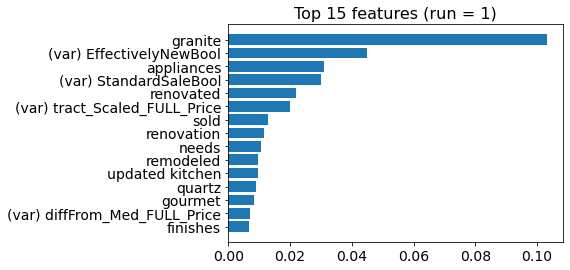

                          Feature  Importance_Score
1                         granite          0.103245
2        (var) EffectivelyNewBool          0.044827
3                      appliances          0.031015
4          (var) StandardSaleBool          0.029897
5                       renovated          0.021796
6   (var) tract_Scaled_FULL_Price          0.019877
7                            sold          0.012911
8                      renovation          0.011523
9                           needs          0.010569
10                      remodeled          0.009801
11                updated kitchen          0.009638
12                         quartz          0.009020
13                        gourmet          0.008426
14  (var) diffFrom_Med_FULL_Price          0.007114
15                       finishes          0.006627


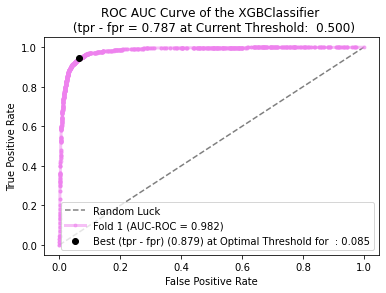

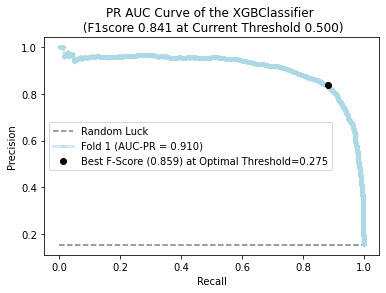


XGBClassifier Run: 2
Raw features total =  324834
Filtered features total =  162417
(Features, Importances) =  162417 162417
.feature_importances_ works


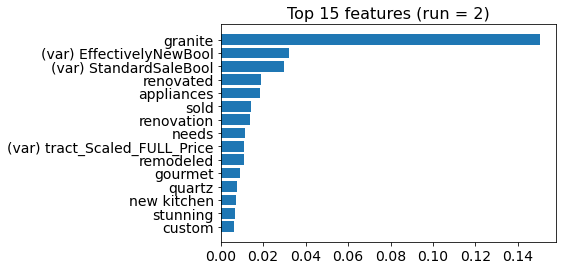

                          Feature  Importance_Score
1                         granite          0.150211
2        (var) EffectivelyNewBool          0.031979
3          (var) StandardSaleBool          0.029847
4                       renovated          0.019124
5                      appliances          0.018307
6                            sold          0.014378
7                      renovation          0.014036
8                           needs          0.011410
9   (var) tract_Scaled_FULL_Price          0.010816
10                      remodeled          0.010744
11                        gourmet          0.008905
12                         quartz          0.007755
13                    new kitchen          0.007425
14                       stunning          0.006955
15                         custom          0.006399


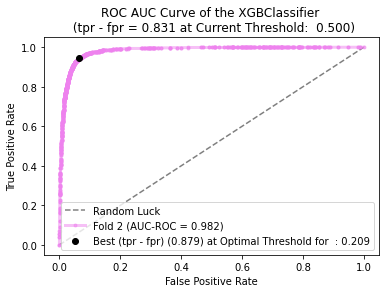

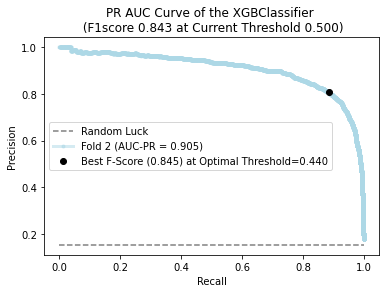


XGBClassifier Run: 3
Raw features total =  323181
Filtered features total =  161590
(Features, Importances) =  161590 161590
.feature_importances_ works


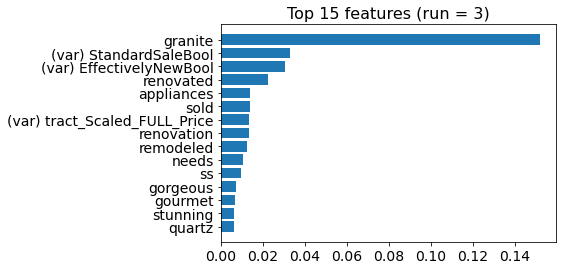

                          Feature  Importance_Score
1                         granite          0.151814
2          (var) StandardSaleBool          0.032849
3        (var) EffectivelyNewBool          0.030770
4                       renovated          0.022605
5                      appliances          0.014162
6                            sold          0.014009
7   (var) tract_Scaled_FULL_Price          0.013646
8                      renovation          0.013556
9                       remodeled          0.012734
10                          needs          0.010512
11                             ss          0.009726
12                       gorgeous          0.007061
13                        gourmet          0.006595
14                       stunning          0.006570
15                         quartz          0.006293


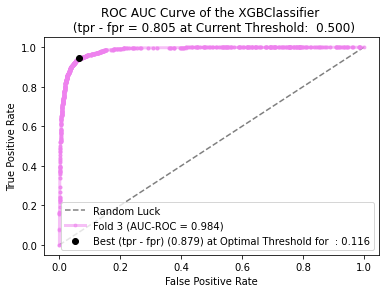

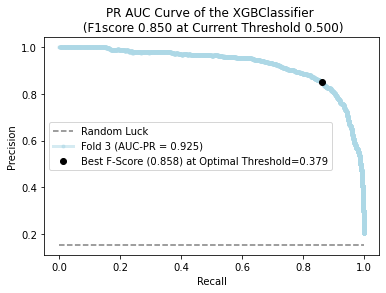


XGBClassifier Run: 4
Raw features total =  296781
Filtered features total =  148390
(Features, Importances) =  148390 148390
.feature_importances_ works


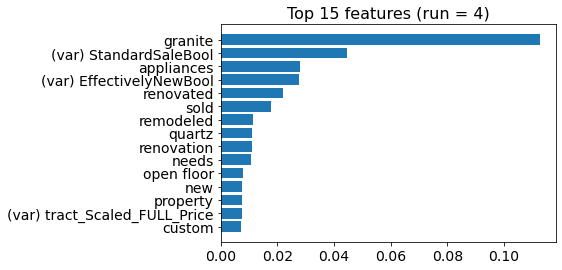

                          Feature  Importance_Score
1                         granite          0.112583
2          (var) StandardSaleBool          0.044454
3                      appliances          0.027930
4        (var) EffectivelyNewBool          0.027674
5                       renovated          0.021829
6                            sold          0.017590
7                       remodeled          0.011515
8                          quartz          0.011070
9                      renovation          0.011024
10                          needs          0.010527
11                     open floor          0.007925
12                            new          0.007497
13                       property          0.007395
14  (var) tract_Scaled_FULL_Price          0.007386
15                         custom          0.007211


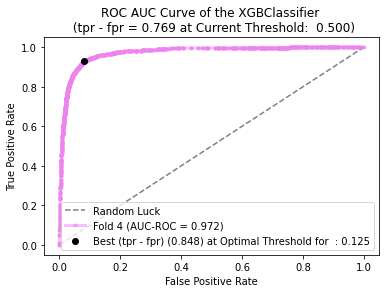

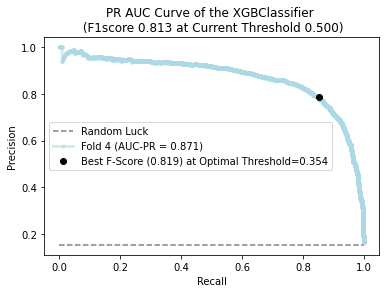

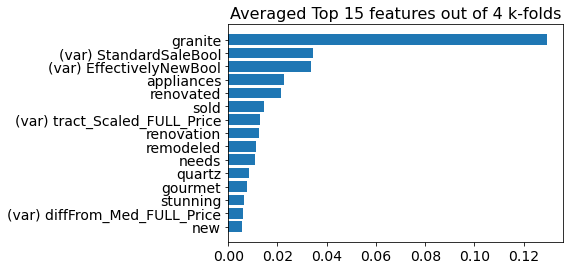

                          Feature  Importance_Score
1                         granite          0.129463
2          (var) StandardSaleBool          0.034262
3        (var) EffectivelyNewBool          0.033813
4                      appliances          0.022853
5                       renovated          0.021338
6                            sold          0.014722
7   (var) tract_Scaled_FULL_Price          0.012931
8                      renovation          0.012535
9                       remodeled          0.011199
10                          needs          0.010755
11                         quartz          0.008535
12                        gourmet          0.007451
13                       stunning          0.006516
14  (var) diffFrom_Med_FULL_Price          0.005806
15                            new          0.005661


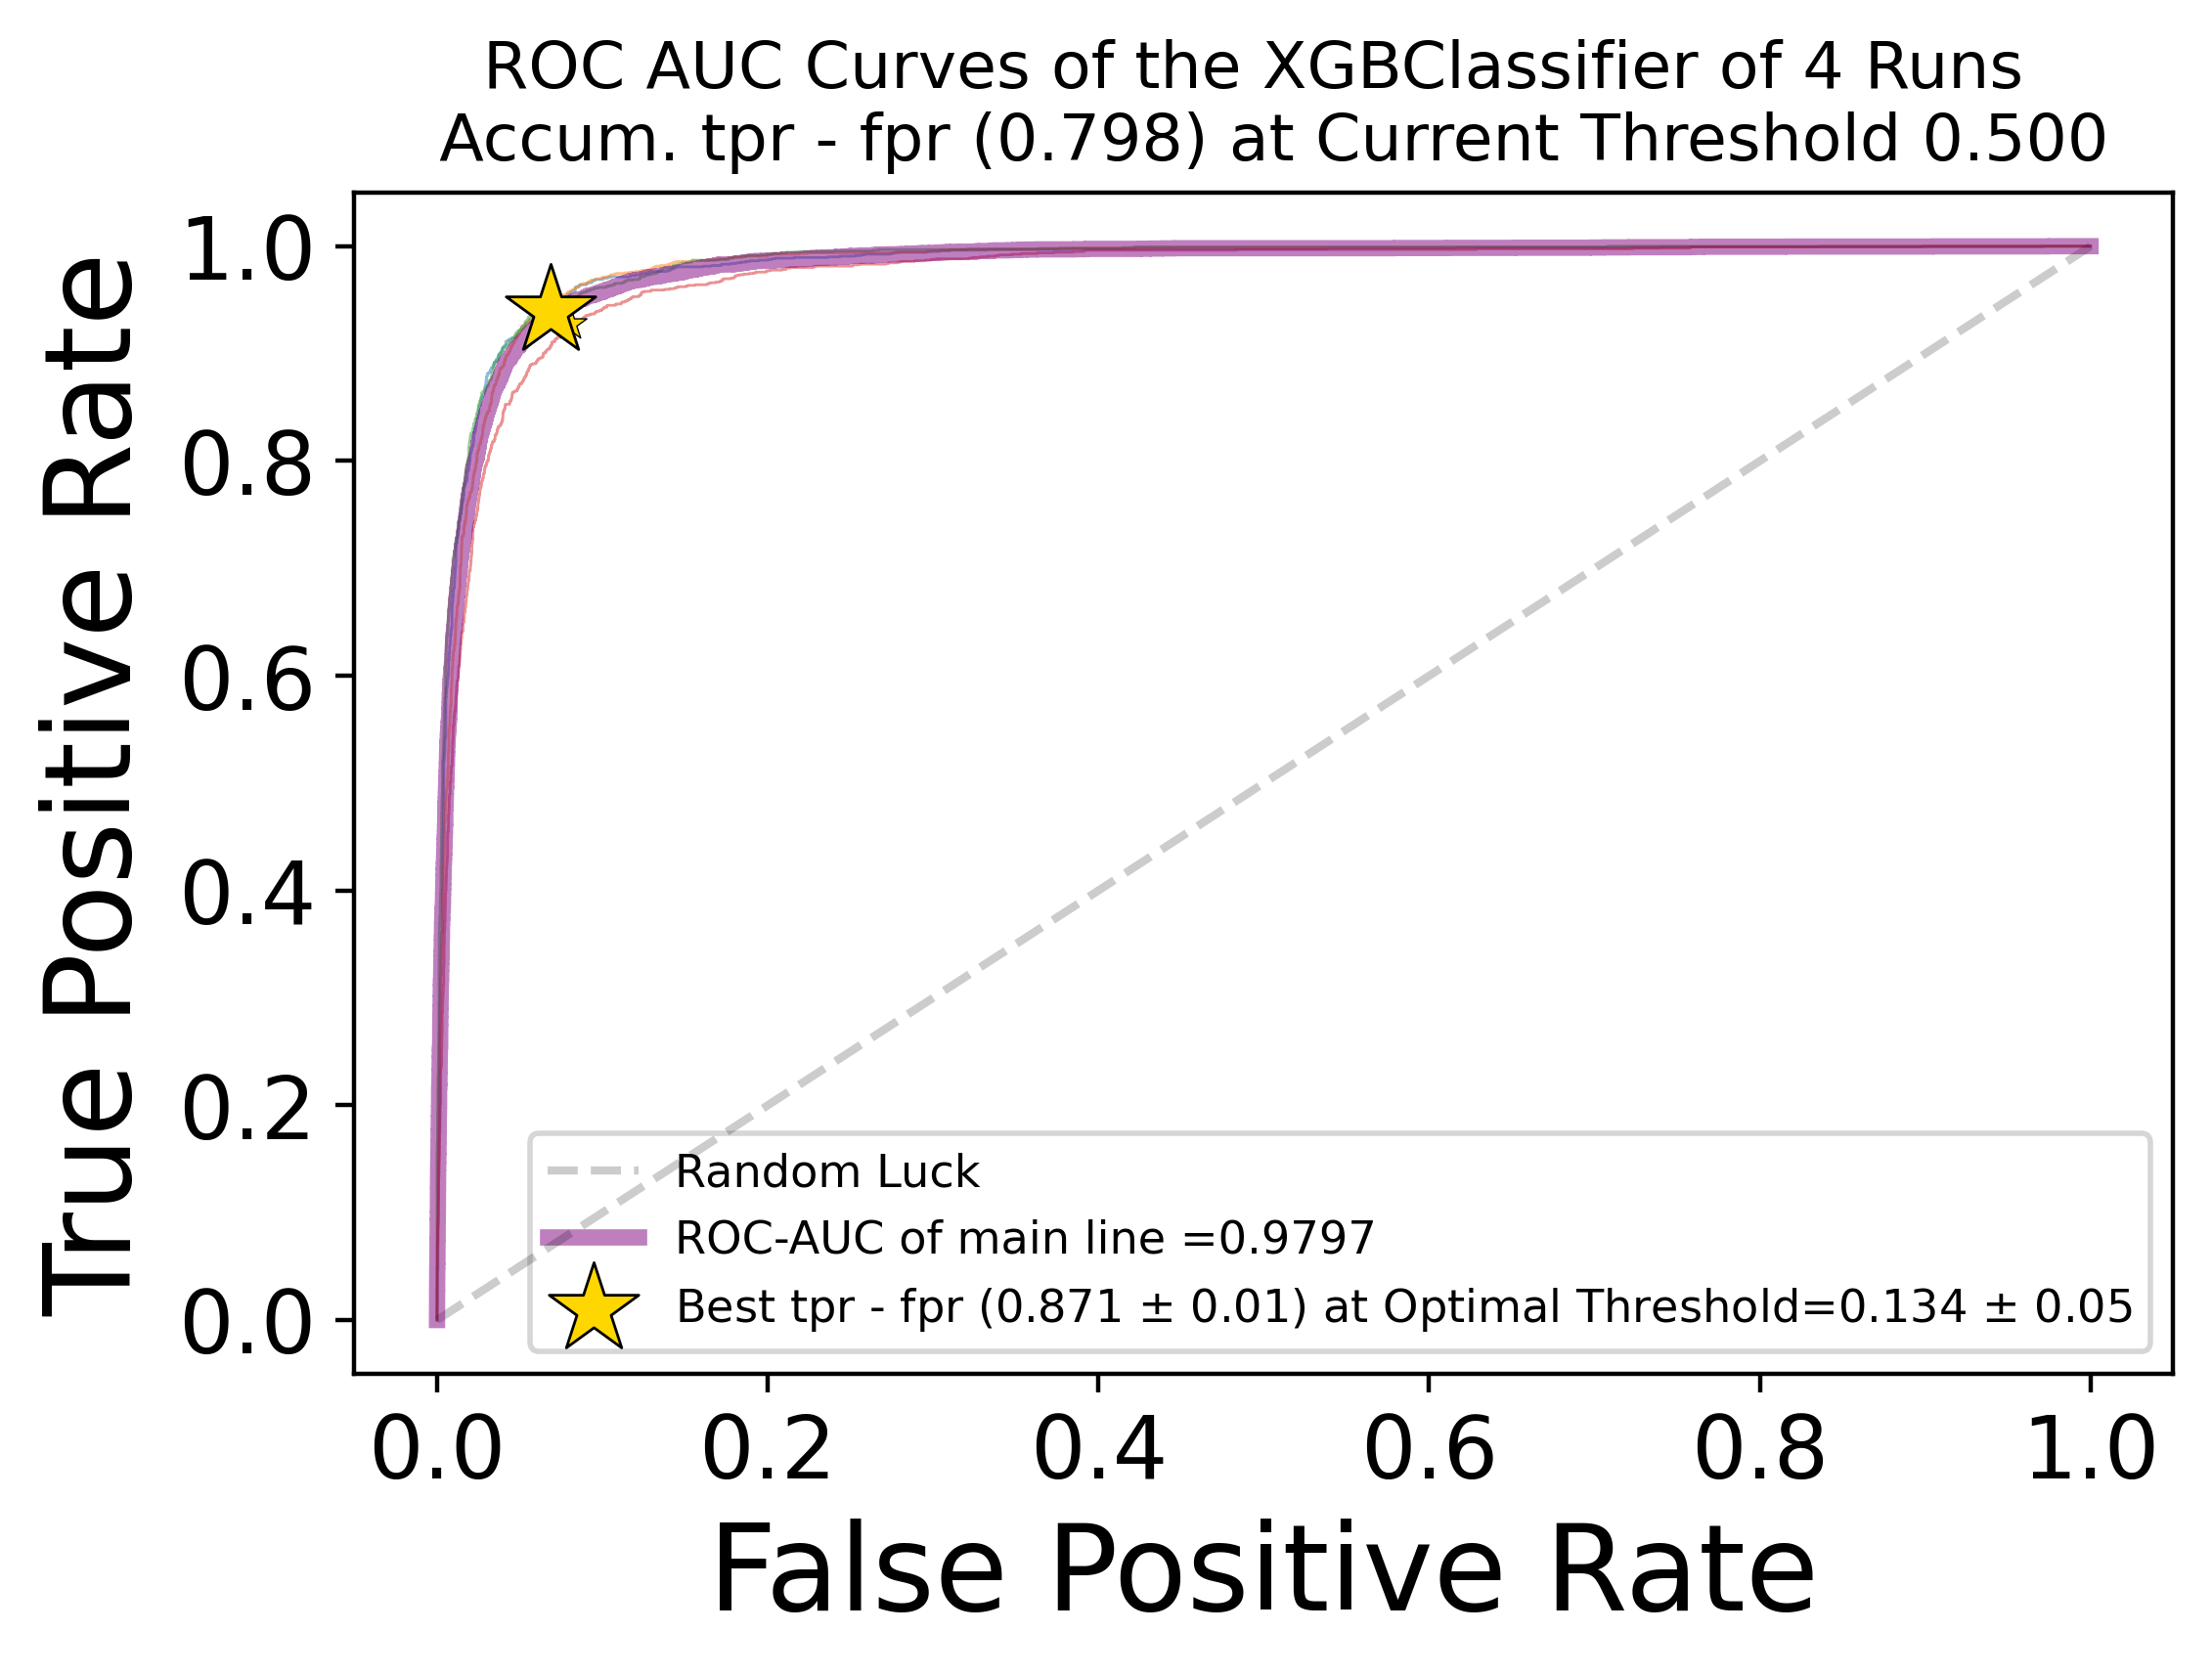

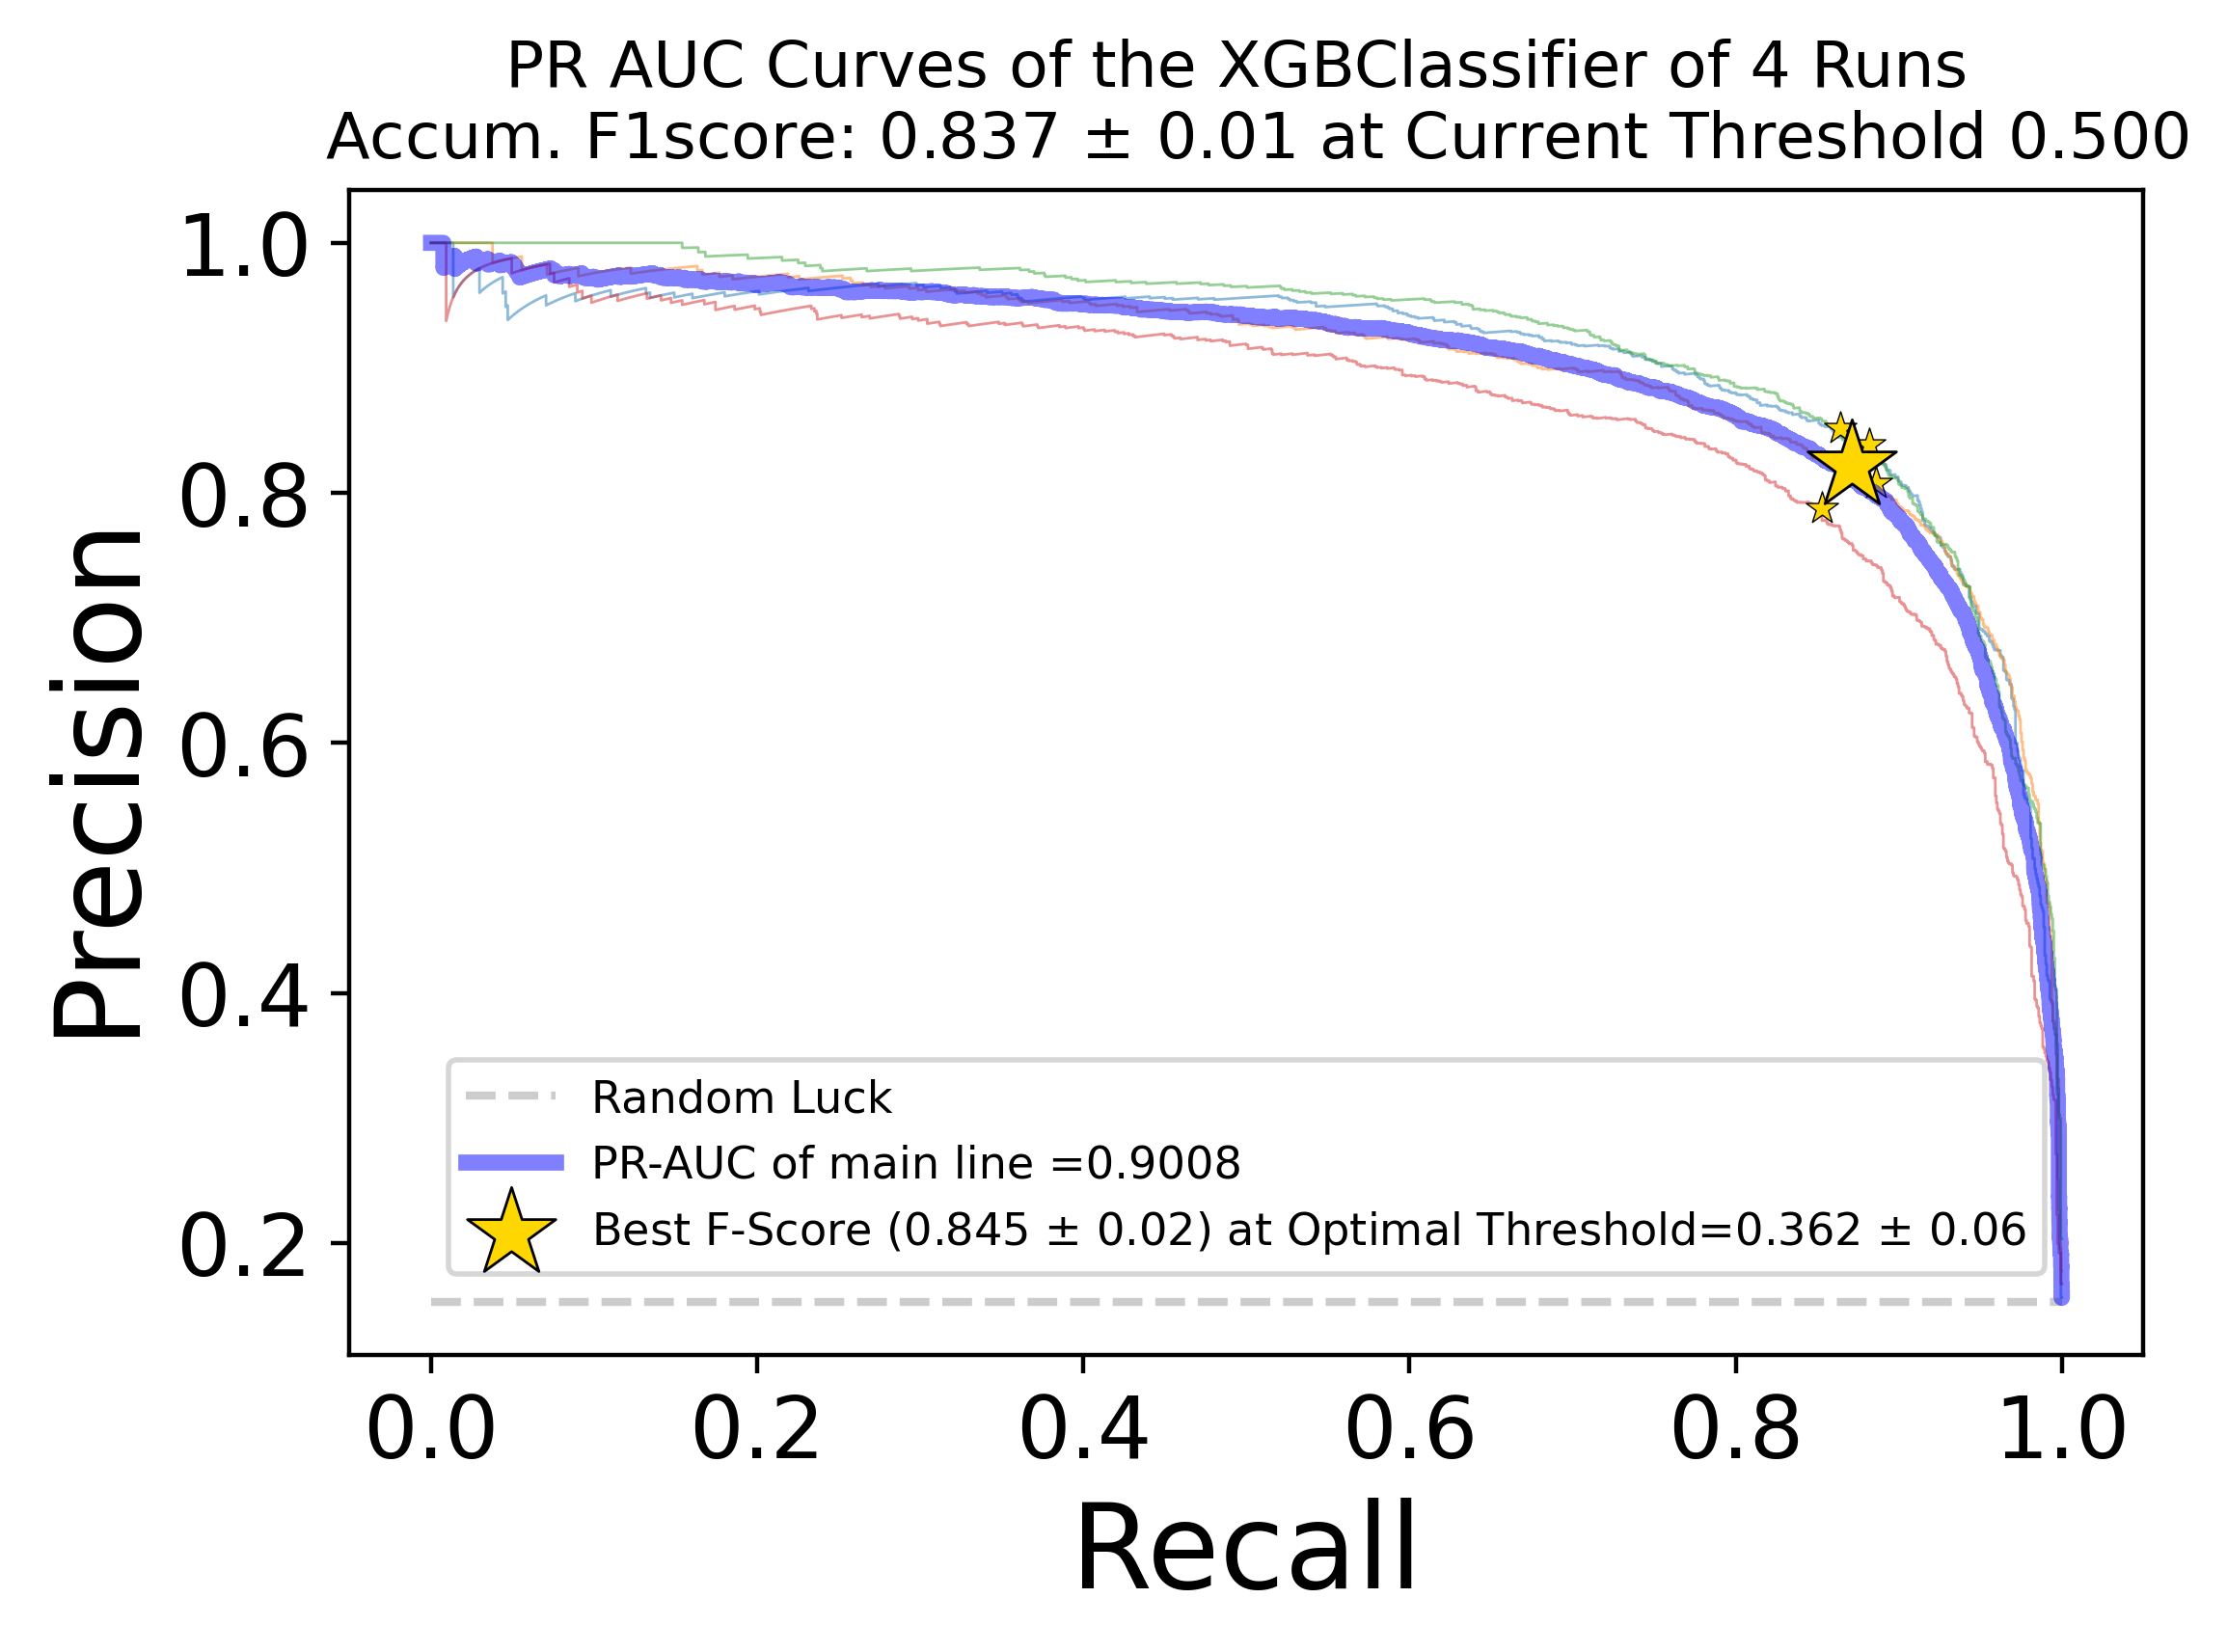

XGBClassifier CV Aggragated Confusion Matrix:  tn: 34905   fp: 944   fn: 1135   tp: 5332    Total: 42316
XGBClassifier CV Average Total accuracy = 0.951 ±0.004
XGBClassifier CV Average Total F1score = 0.837 ±0.014
Wall time: 1min 36s


In [49]:
%%time
# Identify which classification model you want to run the evaluation diagnostics here. 
evaluateRenoModel(df_full_total, reno_model_dict["XGBClassifier"])

### D. Evaluate ARV Regression Models

In [38]:
# Define possible ARV regression models in the 'arv_model_dict' dictionary.
arv_model_dict = {"best_model" : ExtraTreesRegressor(n_jobs=3,random_state=0,min_samples_leaf=2,min_samples_split=5),
                  "ExtraTreesRegressor" :  ExtraTreesRegressor(n_jobs=3,random_state=0,min_samples_leaf=2,min_samples_split=5),
                  "GradientBoostingRegressor" :  GradientBoostingRegressor(),
                  "BayesianRidge" : BayesianRidge(),
                  "KNeighborsRegressor":  KNeighborsRegressor(),
                  "Ridge" : Ridge(),
                  "LinearRegression" : LinearRegression(),
                  "LinearSVR" :  LinearSVR(),
                  "RandomForestRegressor" :   RandomForestRegressor(n_jobs=3,random_state=0,min_samples_leaf=2,min_samples_split=5),
                  }

In [39]:
#df_arv = roller_12month_group_filter(df_arv_temp, "arvdf") # IS THIS USEFUL? DETRIMENTAL? DELETE? BETTER OFF USING TOTAL ROLLER?
#df_arv2= df_arv.copy() # Might not be needed.

In [40]:
def evaluateRegressionModel(_df, _regression_model, _regenerate_scaled_variables, _dftype):

    """
    # test
    _df = df_full_total
    _regression_model = arv_model_dict["best_model"]
    _regenerate_scaled_variables = "skip"
    _dftype = "NONRENO"
    """

    # Generate: Full_total scaler variables for df_full_total
    df_full_total = generate_scaled_variables(_df, run_or_skip = _regenerate_scaled_variables, minSoldsForScaledVariables=5, column_name_dict = base_variable_dict, dftype = "FULL", sub_set = "_total")
    df_full_total = pickle.load(open(r'intermediate_ARV_files\MarylandData_FULL_total.pkl', 'rb'))


    # Predict: Reno status of all df_full_total rows
    df_full_total = predict_reno_status(df_full_total)

    # Split: df_full_total into df_full_train and df_full_test
    df_full_train, df_full_test = train_test_split(df_full_total, test_size=0.2, random_state=25)

    # Generate: Full_train scaler variables for df_full_train
    df_full_train =  generate_scaled_variables(df_full_train, run_or_skip = _regenerate_scaled_variables, 
                        minSoldsForScaledVariables=5, column_name_dict = base_variable_dict, dftype = "FULL", sub_set = "_train")
    df_full_train = pickle.load(open(r'intermediate_ARV_files\MarylandData_FULL' + "_train" + '.pkl', 'rb'))


    # Apply: Full_train scalers to df_full_test (including the Full_train_COUNT variable)
    Scaler_Dict_full_train = pickle.load(open("intermediate_ARV_scalers/scalers_dict_FULL"+ "_train" + ".pkl", 'rb'))
    Median_Dict_full_train = pickle.load(open("intermediate_ARV_scalers/medians_dict_FULL" + "_train" + ".pkl", 'rb'))
    Count_Dict_full_train = pickle.load(open("intermediate_ARV_scalers/count_dict_FULL" + "_train" + ".pkl", 'rb'))
    df_full_test = apply_old_scalers_to_new_data(_df=df_full_test, run_or_skip = _regenerate_scaled_variables,  column_name_dict = base_variable_dict, dftype = "FULL", sub_set = "_train",
                        scaler_dict = Scaler_Dict_full_train, median_dict = Median_Dict_full_train, count_dict = Count_Dict_full_train)
    df_full_test = pickle.load(open(r'intermediate_ARV_files\MarylandData_FULL' + "_test" + '.pkl', 'rb'))

    # Filter: the df_full_train  to df_dftype_train and the df_full_test to df_dftype_test (or to df_nonreno_train. df_nonreno_test)
    if _dftype == "ARV":
        df_dftype_train = df_full_train[(df_full_train["bestModel_reno"]==1)&(df_full_train["Count_FULL_train_TypeYearTract"]>=1)].copy()
        df_dftype_test = df_full_test[(df_full_test["bestModel_reno"]==1)&(df_full_test["Count_FULL_train_TypeYearTract"]>=1)].copy() # Correctly uses the applied "Count_train". Count_test does not exist.
        dftype_variable_dict = ARV_variable_dict 
        dftype_columns_total = ARV_Columns_total
        dftype_columns_train = ARV_Columns_train 
    elif _dftype == "NONRENO":
        df_dftype_train = df_full_train[(df_full_train["bestModel_reno"]==0)&(df_full_train["Count_FULL_train_TypeYearTract"]>=1)].copy()
        df_dftype_test = df_full_test[(df_full_test["bestModel_reno"]==0)&(df_full_test["Count_FULL_train_TypeYearTract"]>=1)].copy() # Correctly uses the applied "Count_train". Count_test does not exist. 
        dftype_variable_dict = NONRENO_variable_dict
        dftype_columns_total = NONRENO_Columns_total
        dftype_columns_train = NONRENO_Columns_train      
    elif _dftype == "FULL":
        df_dftype_train = df_full_train[(df_full_train["Count_FULL_train_TypeYearTract"]>=1)].copy()
        df_dftype_test = df_full_test[(df_full_test["Count_FULL_train_TypeYearTract"]>=1)].copy() # Correctly uses the applied "Count_train". Count_test does not exist.
        dftype_variable_dict = FULL_variable_dict  
        dftype_columns_total = FULL_Columns_total
        dftype_columns_train = FULL_Columns_train 


    else:
        print("PROBLEM! Invalid _dftype")
        return

    # Merge train and test set to make the arv roller 12 month column update. NECESSARY? Could use the Full Total roller instead. 
    df_dftype_train["temp_tag"]="train"
    df_dftype_test["temp_tag"]="test"
    df_dftype_tempmerge = pd.concat([df_dftype_train, df_dftype_test])
    df_dftype_tempmerge = roller_12month_group_filter(df_dftype_tempmerge, _dftype.lower() + "df") # IS THIS USEFUL? DETRIMENTAL? DELETE? BETTER OFF USING TOTAL ROLLER?
    df_dftype_train = df_dftype_tempmerge[df_dftype_tempmerge["temp_tag"]=="train"]
    df_dftype_test = df_dftype_tempmerge[df_dftype_tempmerge["temp_tag"]=="test"]

    # Generate: ARV_train scaler variables for df_dftype_train (or the nonreno_train scaler variables for df_nonreno_train)
    df_dftype_train = generate_scaled_variables(df_dftype_train, run_or_skip = _regenerate_scaled_variables, minSoldsForScaledVariables=5, column_name_dict = dftype_variable_dict, dftype = _dftype, sub_set = "_train")
    df_dftype_train = pickle.load(open(r'intermediate_ARV_files\MarylandData_' + _dftype + '_train.pkl', 'rb'))



    # Apply: The ARV_train scalers to df_dftype_test - Including the ARV_train_COUNT variable (or the nonreno versions...)
    Scaler_Dict_dftype_train = pickle.load(open("intermediate_ARV_scalers/scalers_dict_" + _dftype + "_train" + ".pkl", 'rb'))
    Median_Dict_dftype_train = pickle.load(open("intermediate_ARV_scalers/medians_dict_" + _dftype + "_train" + ".pkl", 'rb'))
    Count_Dict_dftype_train = pickle.load(open("intermediate_ARV_scalers/count_dict_" + _dftype + "_train" + ".pkl", 'rb'))
    RenoPerc_Dict_any_train = pickle.load(open("intermediate_ARV_scalers/renoperc_dict_" + "Any" + "_train" + ".pkl", 'rb'))
    df_dftype_test = apply_old_scalers_to_new_data(_df=df_dftype_test, run_or_skip = _regenerate_scaled_variables,  column_name_dict = dftype_variable_dict, dftype = _dftype, sub_set = "_train",
                        scaler_dict = Scaler_Dict_dftype_train, median_dict = Median_Dict_dftype_train, count_dict = Count_Dict_dftype_train, renoperc_dict = RenoPerc_Dict_any_train)   

    # Filter: The df_dftype_test to df_dftype_test_predictable (or df_nonreno version)
    df_dftype_test = pickle.load(open(r'intermediate_ARV_files\MarylandData_' + _dftype + '_test.pkl', 'rb'))   
    df_dftype_test_predictable = df_dftype_test[~df_dftype_test["medianPrice_"+ _dftype +"_TypeYearTract"].isnull()] # #df_dftype_test_unpredictable = df_dftype_test[df_dftype_test.medianPrice_ARV_TypeYearTract.isnull()] #examination only

    # Fit-Predict: ARV of df_dftype_test_predictable (or nonreno value of df_nonreno_test_predictable or regular value of df_full_test_predictable)
    regression_model_trained, df_dftype_test_predicted = estimate_value_and_errors(_regression_model, df_dftype_train, df_dftype_test_predictable, dftype_columns_train, YColumn )

    # Print average dollar error
    print(df_dftype_test_predicted["AbsDollarError"].mean())
    
    # Print: Generated evaluation metrics.
    generate_feature_importances(regression_model_trained, dftype_columns_train)

    # Return predicted test set
    return df_dftype_test_predicted 



Skipping the generation of new scaled variables for FULL _total
Raw features total =  388010
Filtered features total =  194005
(Features, Importances) =  194005 194005
.coef_[0] works
Skipping the generation of new scaled variables for FULL _train
Skipping the new application of scaled variables for FULL _train
arvdf_year_group_1 :  2021-03-04 00:00:00
arvdf_year_group_2 :  2020-03-04 00:00:00
arvdf_year_group_3 :  2019-03-04 00:00:00
arvdf_year_group_4 :  2018-03-04 00:00:00
arvdf_year_group_5 :  2017-03-04 00:00:00
arvdf_year_group_6 :  2016-03-04 00:00:00
Skipping the generation of new scaled variables for ARV _train
Skipping the new application of scaled variables for ARV _train
Accuracy on Training set:  0.9829953621595576
Accuracy on Testing set:  0.8499882605151783 (aka. R2Score)

Dollar Errors by Quantile:
count    2.035800e+04
mean     4.216285e+04
std      9.085228e+04
min      1.396667e+00
25%      8.802817e+03
50%      2.068773e+04
75%      4.370480e+04
max      4.164358e+0

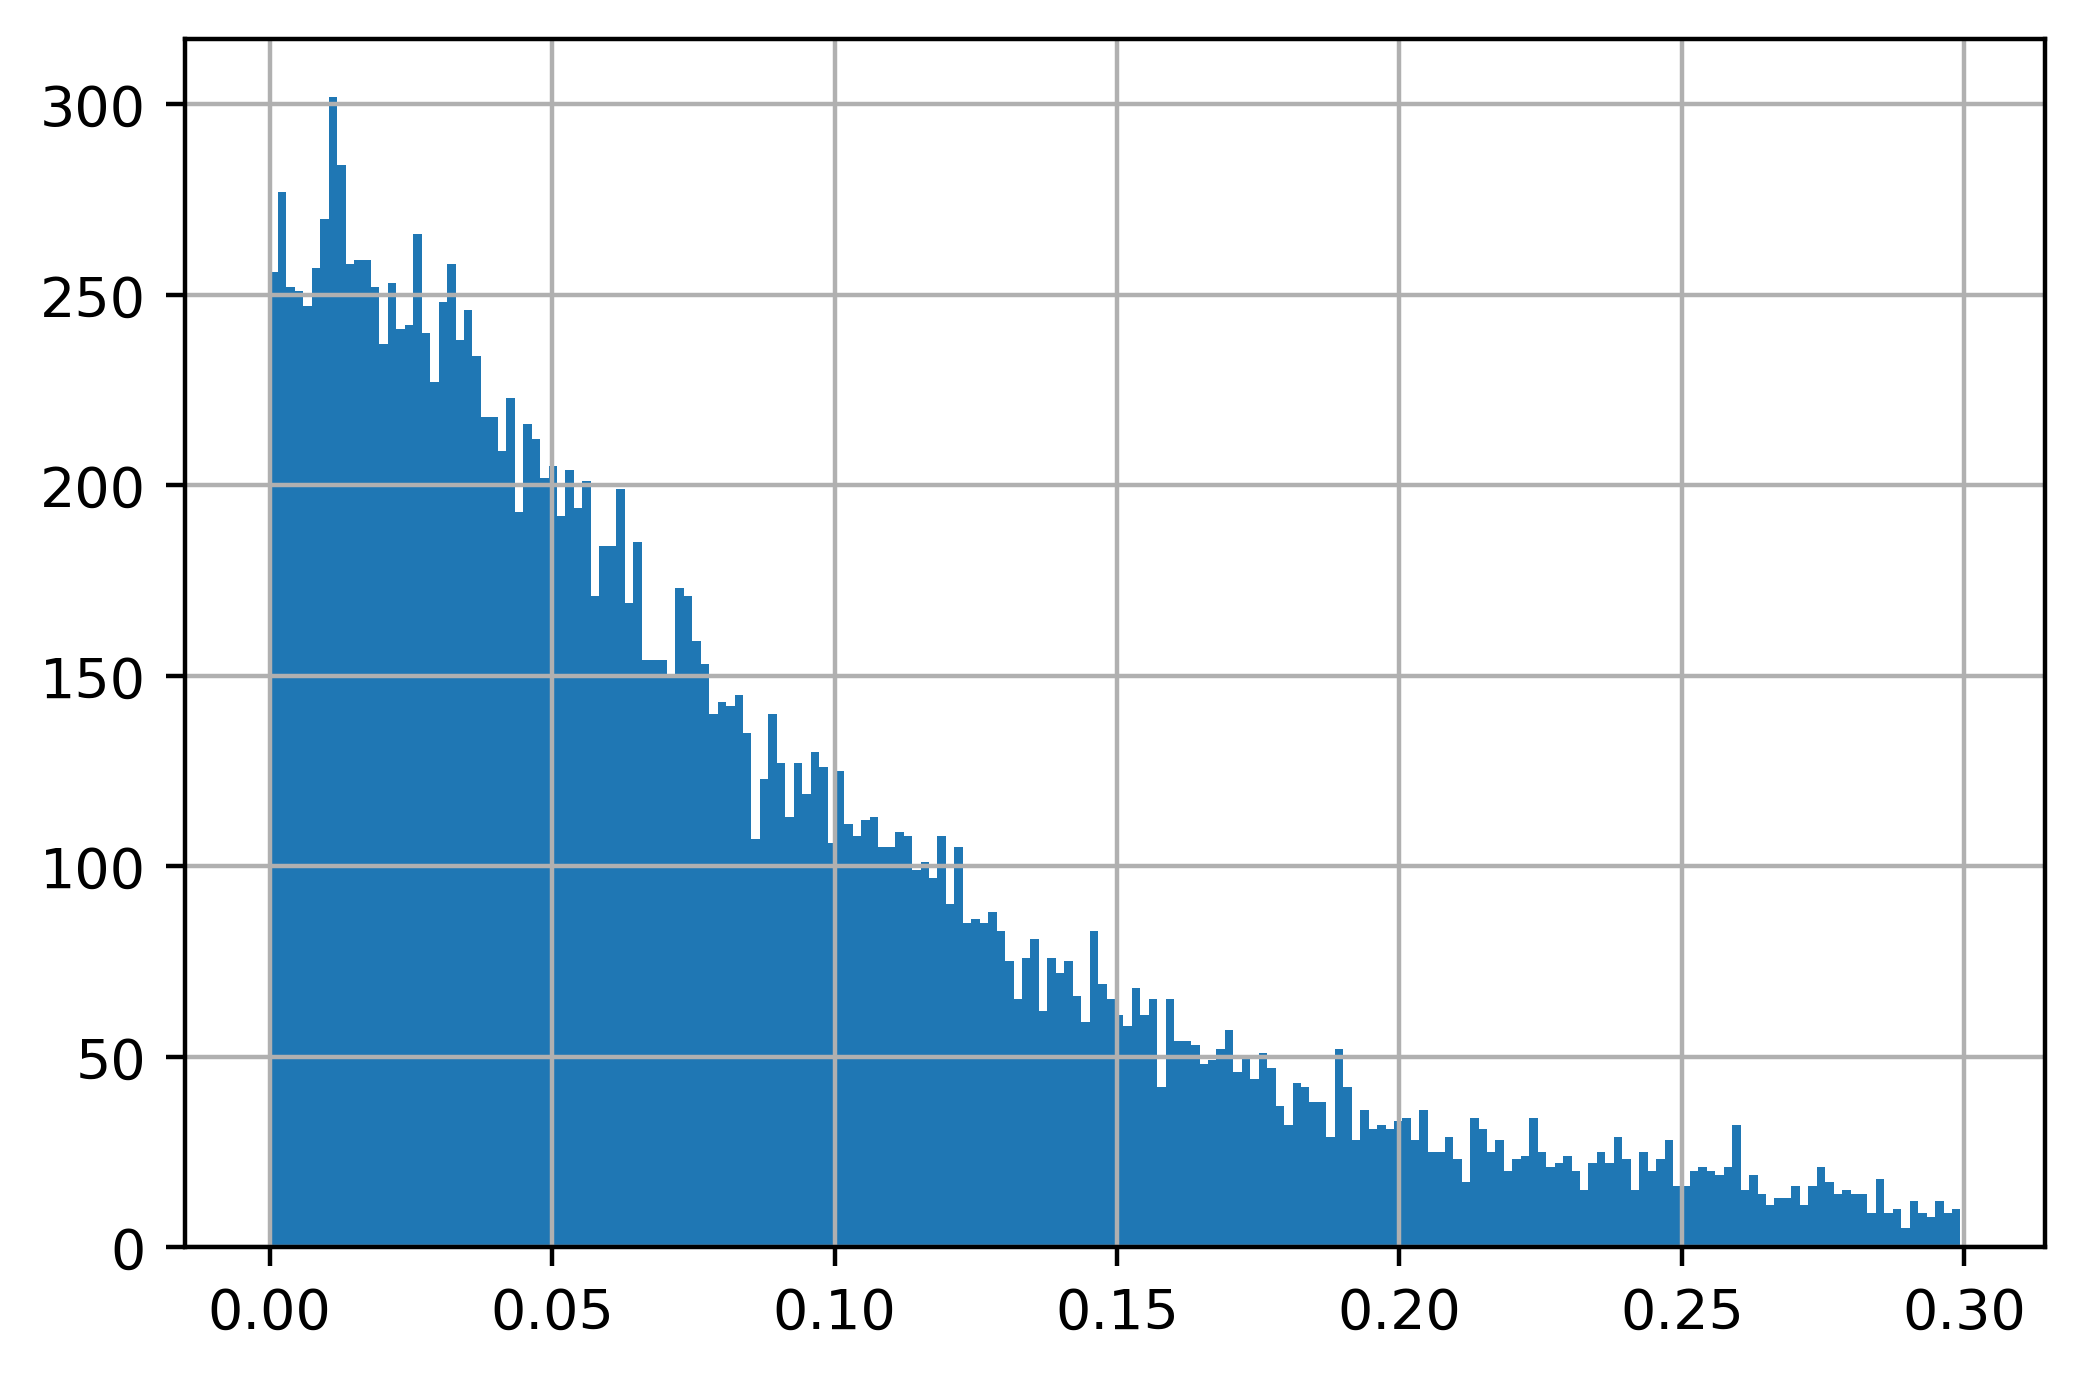

In [41]:
%%time 
df_reno_test_predicted = evaluateRegressionModel(df_full_total, arv_model_dict["best_model"],  _regenerate_scaled_variables = "run", _dftype = "ARV")


Skipping the generation of new scaled variables for FULL _total
Raw features total =  388010
Filtered features total =  194005
(Features, Importances) =  194005 194005
.coef_[0] works
Skipping the generation of new scaled variables for FULL _train
Skipping the new application of scaled variables for FULL _train
nonrenodf_year_group_1 :  2021-03-04 00:00:00
nonrenodf_year_group_2 :  2020-03-04 00:00:00
nonrenodf_year_group_3 :  2019-03-04 00:00:00
nonrenodf_year_group_4 :  2018-03-04 00:00:00
nonrenodf_year_group_5 :  2017-03-04 00:00:00
nonrenodf_year_group_6 :  2016-03-04 00:00:00
Skipping the generation of new scaled variables for NONRENO _train
Skipping the new application of scaled variables for NONRENO _train
Accuracy on Training set:  0.982957022901844
Accuracy on Testing set:  0.8446580547235498 (aka. R2Score)

Dollar Errors by Quantile:
count    3.822100e+04
mean     4.421321e+04
std      7.031129e+04
min      8.333333e-02
25%      1.182291e+04
50%      2.732192e+04
75%      5.

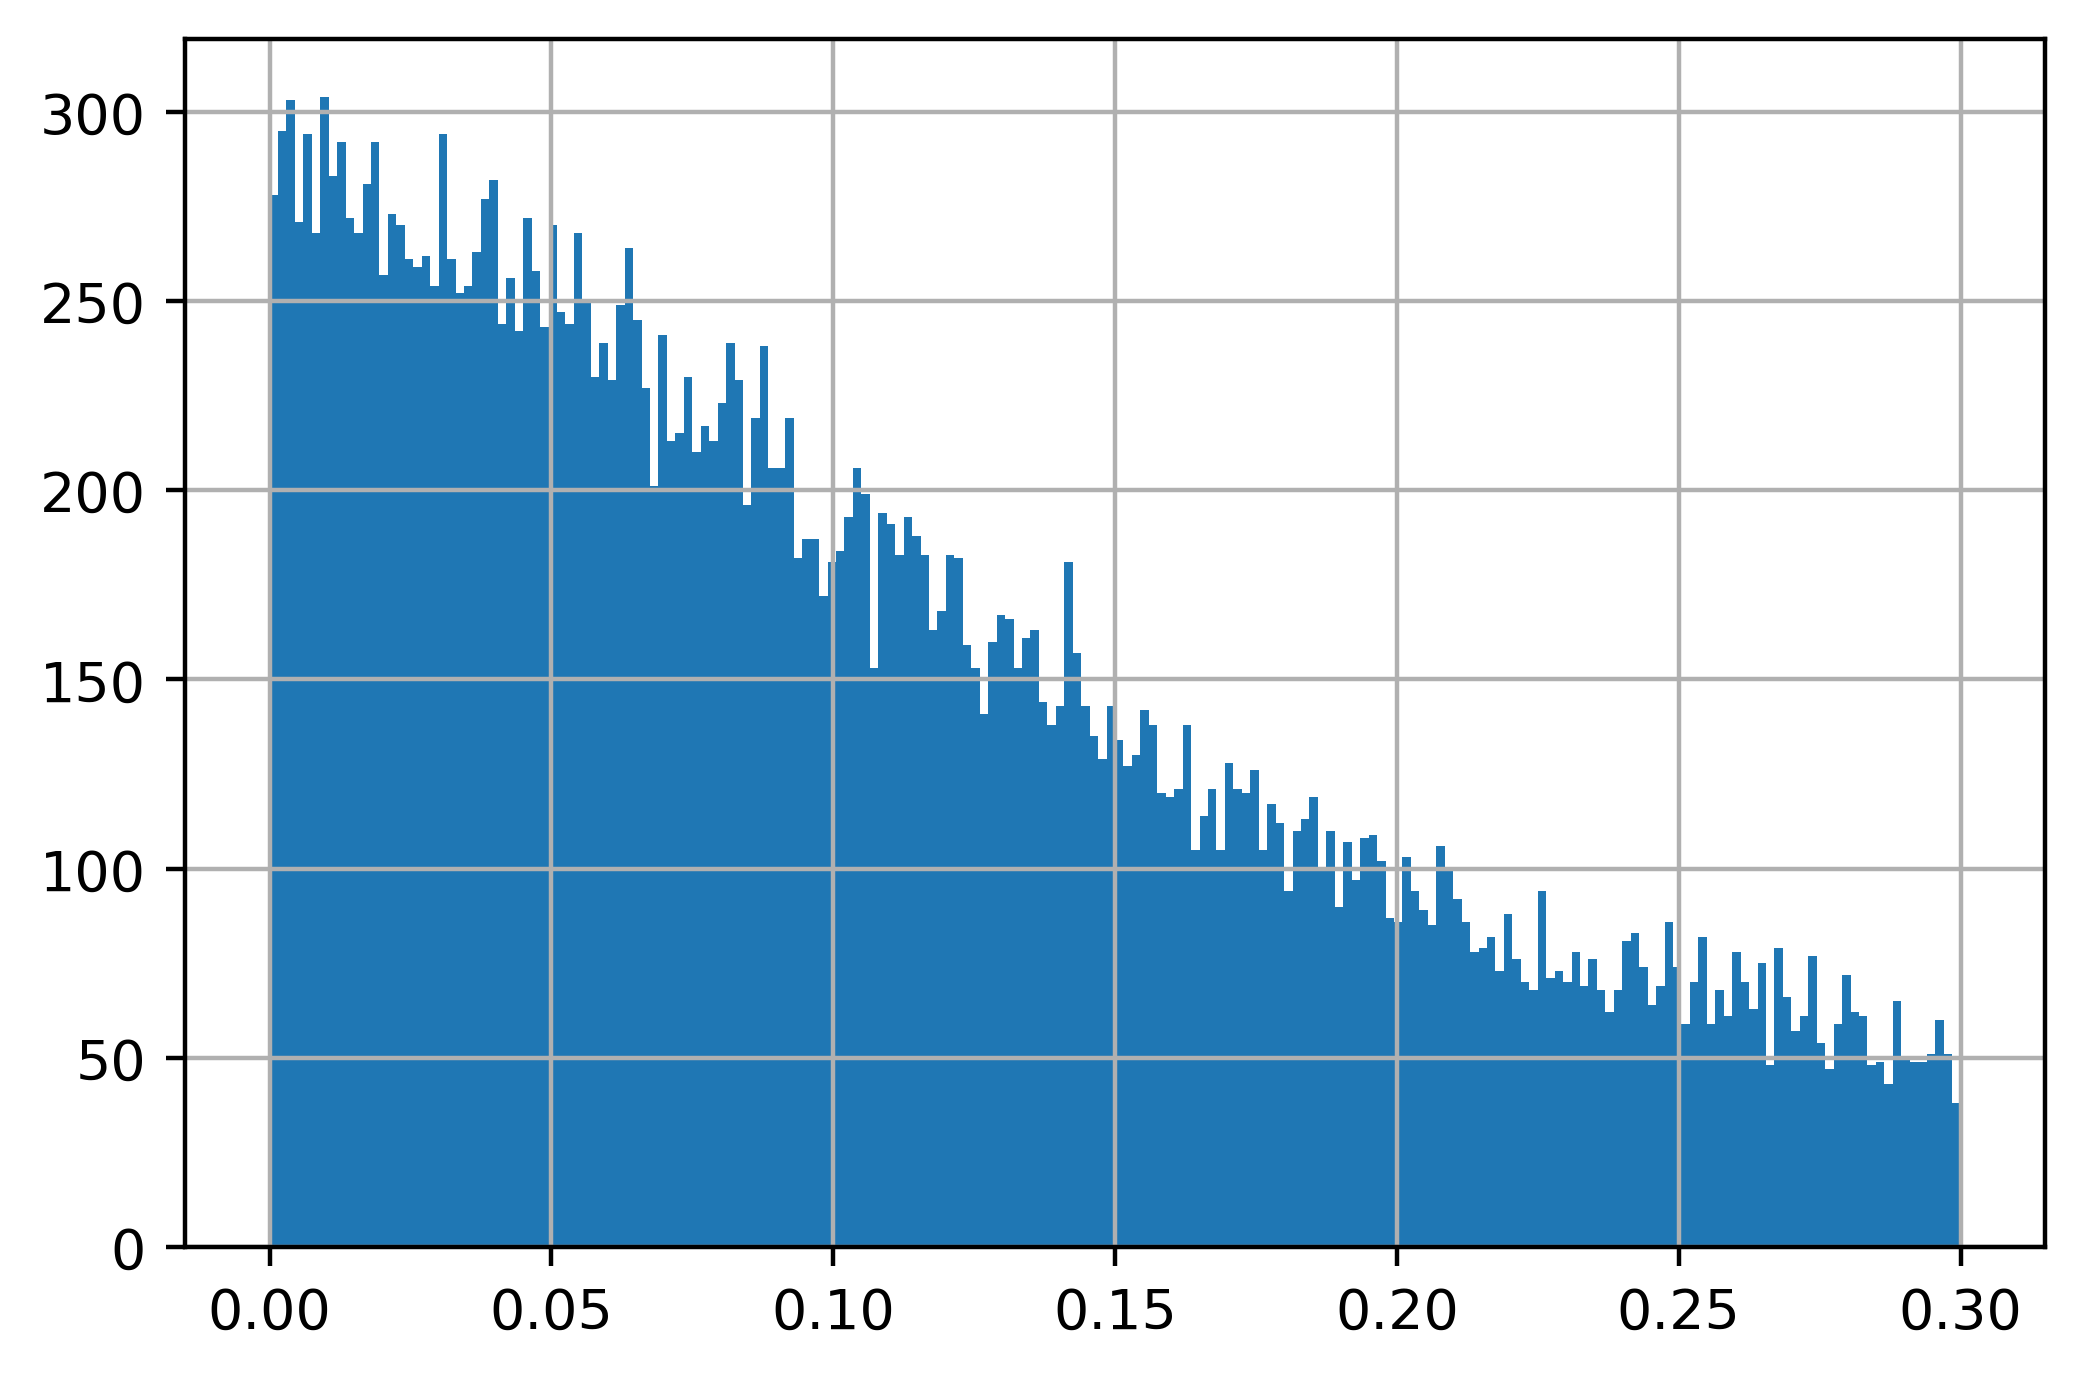

In [42]:
%%time
df_nonreno_test_predicted = evaluateRegressionModel(df_full_total, arv_model_dict["best_model"],  _regenerate_scaled_variables = "run", _dftype = "NONRENO")

Skipping the generation of new scaled variables for FULL _total
Raw features total =  388010
Filtered features total =  194005
(Features, Importances) =  194005 194005
.coef_[0] works
Skipping the generation of new scaled variables for FULL _train
Skipping the new application of scaled variables for FULL _train
fulldf_year_group_1 :  2021-03-04 00:00:00
fulldf_year_group_2 :  2020-03-04 00:00:00
fulldf_year_group_3 :  2019-03-04 00:00:00
fulldf_year_group_4 :  2018-03-04 00:00:00
fulldf_year_group_5 :  2017-03-04 00:00:00
fulldf_year_group_6 :  2016-03-04 00:00:00
Skipping the generation of new scaled variables for FULL _train
Skipping the new application of scaled variables for FULL _train
Accuracy on Training set:  0.9830708236246709
Accuracy on Testing set:  0.8539879725550614 (aka. R2Score)

Dollar Errors by Quantile:
count    5.909400e+04
mean     4.519204e+04
std      7.685706e+04
min      9.416667e-01
25%      1.179957e+04
50%      2.675482e+04
75%      5.261266e+04
max      4.0

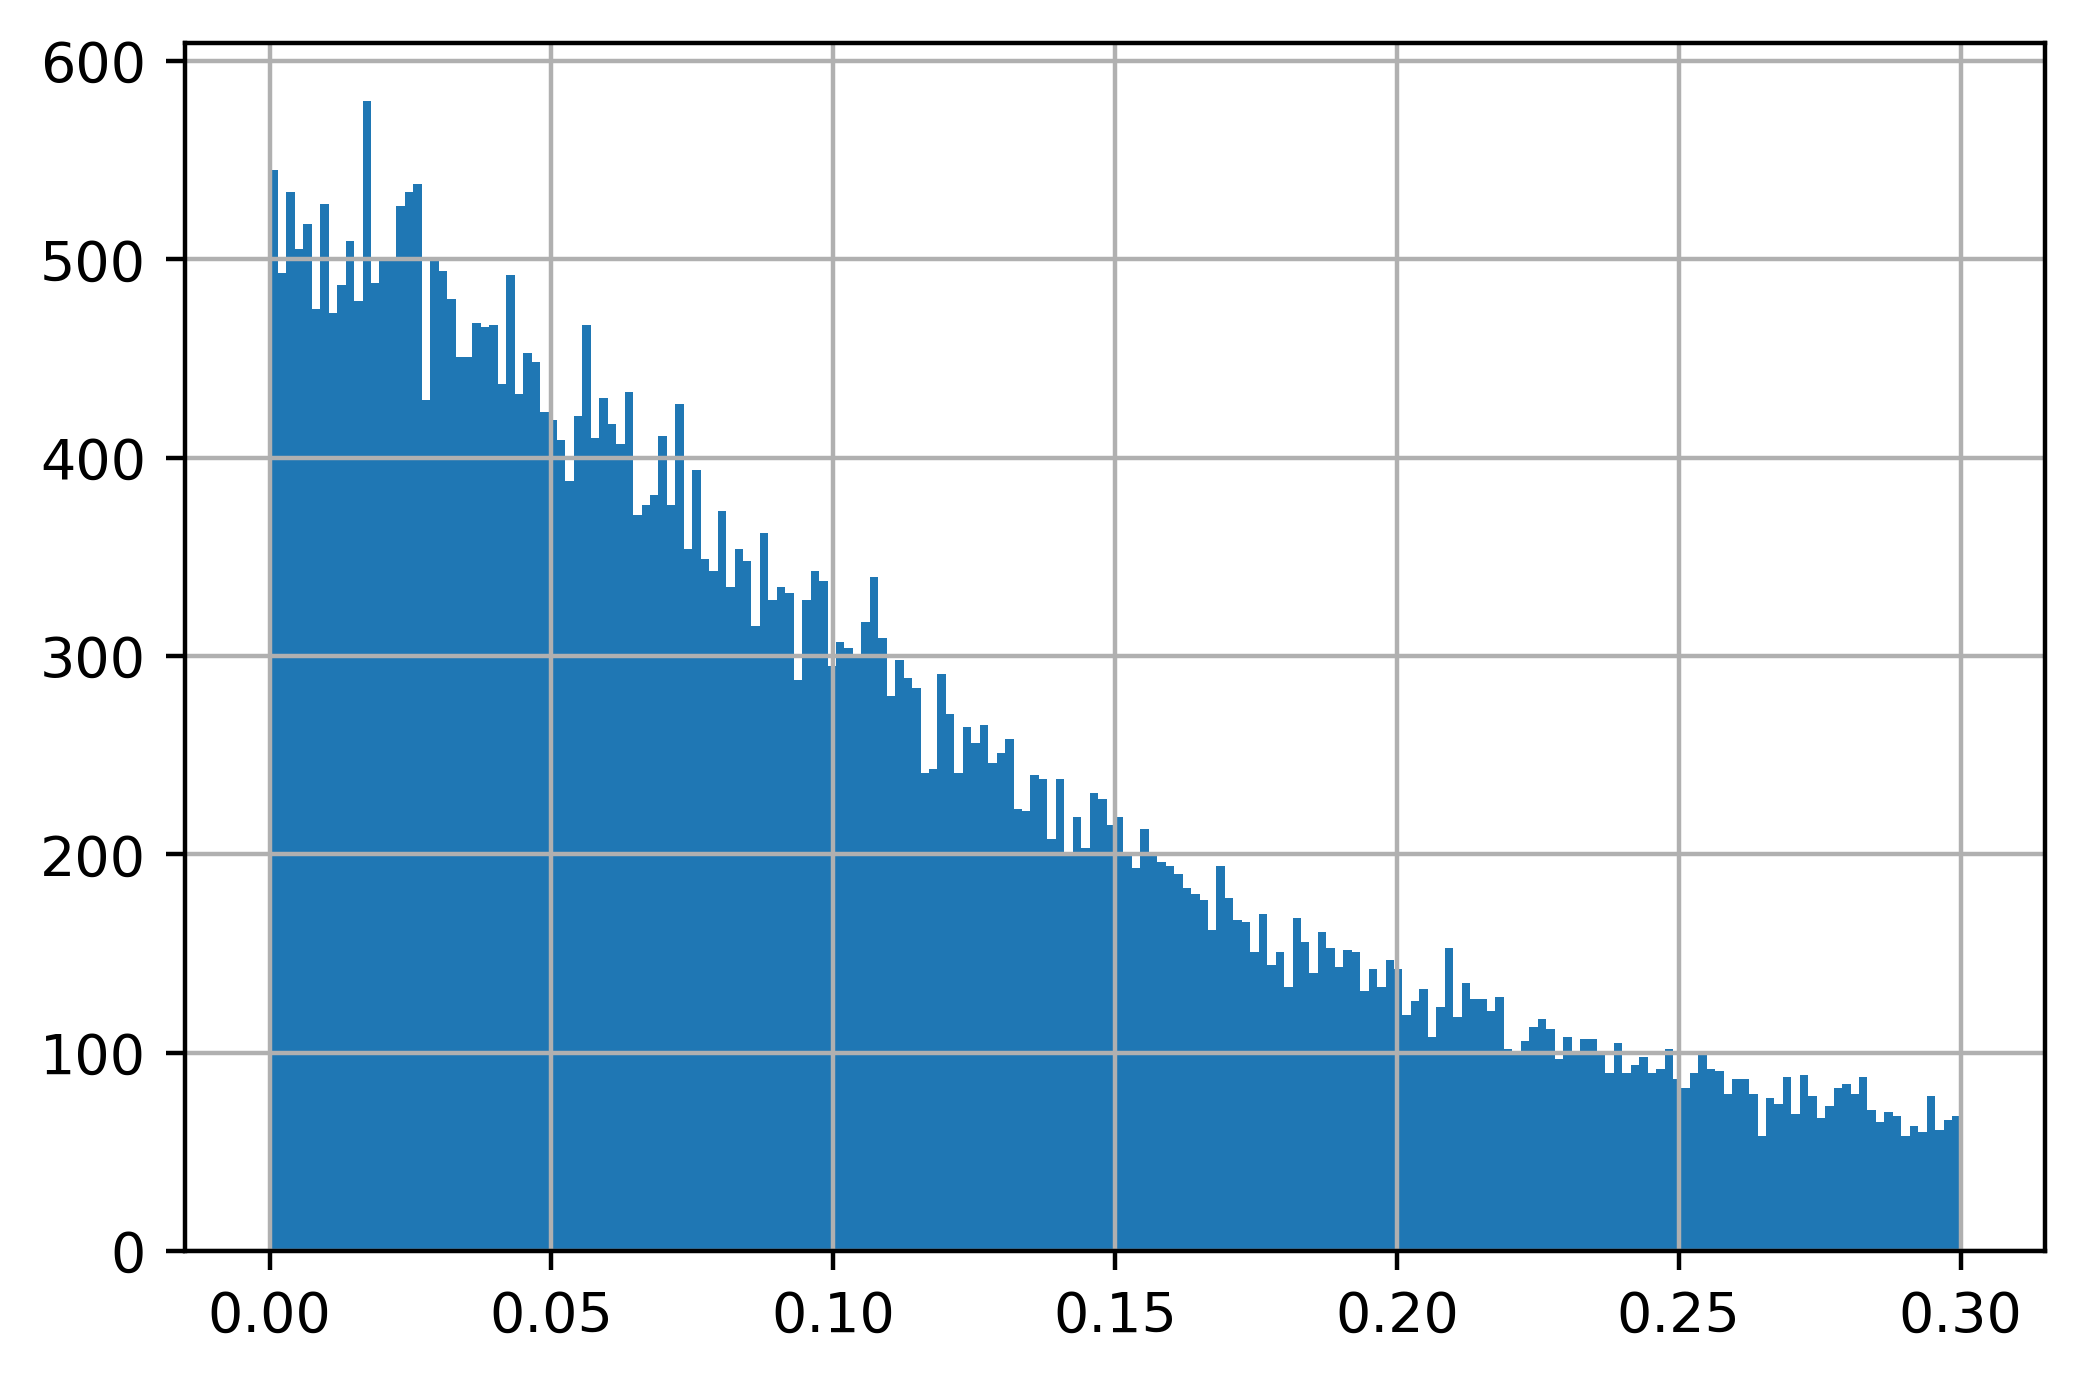

In [43]:
%%time
df_full_test_predicted = evaluateRegressionModel(df_full_total, arv_model_dict["best_model"],  _regenerate_scaled_variables = "run", _dftype = "FULL")


### Compare ARV vs NonReno vs Total Regression Model Errors

In [44]:
# Reno vs. Full Model


 Null hypothesis (H0): u1 = u2. 
 Welch's t-test= 1.7481 
 p-value = 0.0804 If pvalue < 0.5, then reject the null hypothesis and say difference is statistically significant.
 Welch-Satterthwaite Degrees of Freedom= 59095.7497

 Errors 1 described:
        AbsPercError
count  5.909400e+04
mean   5.120209e+01
std    5.647391e+03
min    3.553459e-04
25%    4.498352e+00
50%    1.043106e+01
75%    2.171658e+01
max    1.347730e+06

Errors 2 described:
        AbsPercError
count  20358.000000
mean      10.589633
std       15.988414
min        0.000285
25%        2.972535
50%        6.635774
75%       12.878290
max      853.313352 



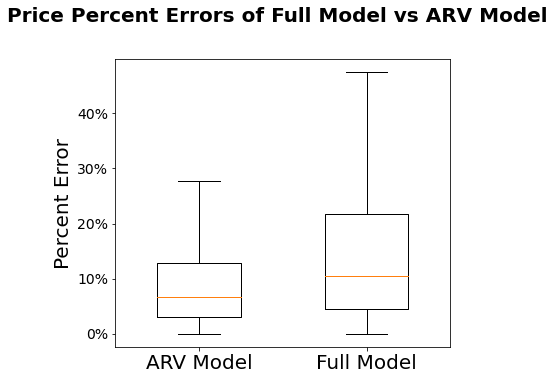

In [48]:
errors_1 = df_full_test_predicted["AbsPercError"]*100
errors_2 = df_reno_test_predicted["AbsPercError"]*100
model_name_1 = "Full Model"
model_name_2 = "ARV Model"
title_text = 'Price Percent Errors of ' + model_name_1 +' vs '+ model_name_2
plot_error_comparisons(errors_1, errors_2, title_text, model_name_1, model_name_2, percentile = 1, percentile_literature_lines = 0)


 Null hypothesis (H0): u1 = u2. 
 Welch's t-test= -4.0663 
 p-value = 0.0000 If pvalue < 0.5, then reject the null hypothesis and say difference is statistically significant.
 Welch-Satterthwaite Degrees of Freedom= 31010.6274

 Errors 1 described:
        AbsDollarError
count    2.036100e+04
mean     4.221400e+06
std      9.070711e+06
min      1.050000e+02
25%      8.811750e+05
50%      2.042521e+06
75%      4.343059e+06
max      4.090122e+08

Errors 2 described:
        AbsDollarError
count    5.909600e+04
mean     4.510062e+06
std      7.680987e+06
min      1.155000e+02
25%      1.174198e+06
50%      2.671382e+06
75%      5.284212e+06
max      4.070394e+08 



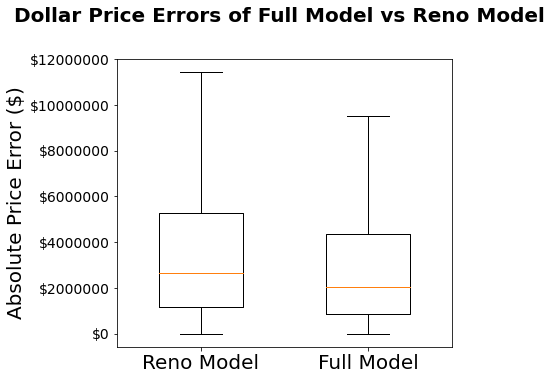

In [44]:
errors_1 = df_full_test_predicted["AbsDollarError"]*100
errors_2 = df_reno_test_predicted["AbsDollarError"]*100
model_name_1 = "Full Model"
model_name_2 = "ARV Model"
title_text = 'Dollar Price Errors of ' + model_name_1 +' vs '+ model_name_2
plot_error_comparisons(errors_1, errors_2, title_text, model_name_1, model_name_2, percentile = 0)

In [18]:
# Reno vs. NonReno Model


 Null hypothesis (H0): u1 = u2. 
 Welch's t-test= -1.5700 
 p-value = 0.1164 If pvalue < 0.5, then reject the null hypothesis and say difference is statistically significant.
 Welch-Satterthwaite Degrees of Freedom= 38225.6419

 Errors 1 described:
        AbsPercError
count  20361.000000
mean      10.526841
std       15.558131
min        0.000374
25%        2.928991
50%        6.616214
75%       12.853629
max      852.327152

Errors 2 described:
        AbsPercError
count  3.822600e+04
mean   6.960468e+01
std    7.356980e+03
min    4.868986e-04
25%    5.284384e+00
50%    1.215541e+01
75%    2.505911e+01
max    1.426535e+06 



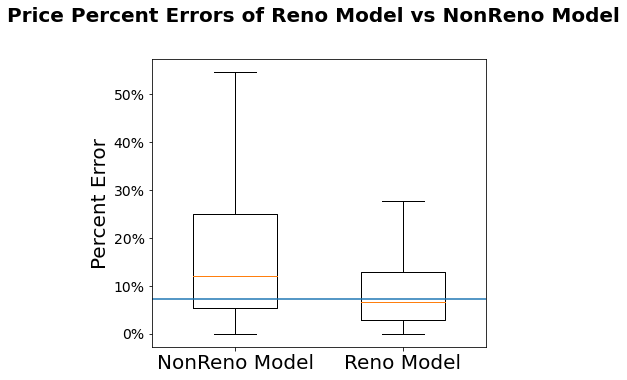

In [39]:
errors_1 = df_reno_test_predicted["AbsPercError"]*100
errors_2 = df_nonreno_test_predicted["AbsPercError"]*100
model_name_1 = "ARV Model"
model_name_2 = "NonReno Model"
title_text = 'Price Percent Errors of ' + model_name_1 +' vs '+ model_name_2
plot_error_comparisons(errors_1, errors_2, title_text, model_name_1, model_name_2, percentile = 1)


 Errors 1 described:
        AbsDollarError
count    2.036100e+04
mean     4.221400e+06
std      9.070711e+06
min      1.050000e+02
25%      8.811750e+05
50%      2.042521e+06
75%      4.343059e+06
max      4.090122e+08

Errors 2 described:
        AbsDollarError
count    3.822600e+04
mean     4.408311e+06
std      6.981001e+06
min      1.889167e+02
25%      1.184157e+06
50%      2.718226e+06
75%      5.278463e+06
max      2.084095e+08 



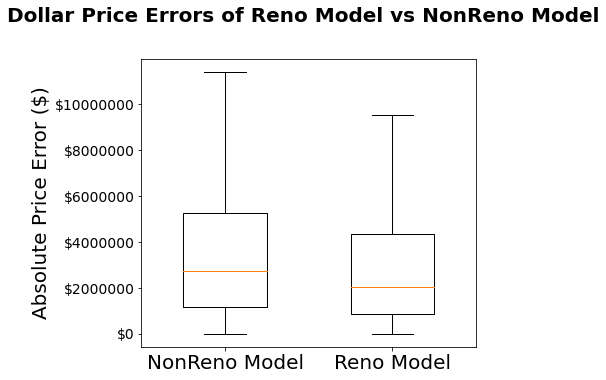

In [20]:
errors_1 = df_reno_test_predicted["AbsDollarError"]*100
errors_2 = df_nonreno_test_predicted["AbsDollarError"]*100
model_name_1 = "ARV Model"
model_name_2 = "NonReno Model"
title_text = 'Dollar Price Errors of ' + model_name_1 +' vs '+ model_name_2
plot_error_comparisons(errors_1, errors_2, title_text, model_name_1, model_name_2, percentile = 0)

In [21]:
# Full vs. NonReno Model


 Errors 1 described:
        AbsPercError
count  5.909600e+04
mean   4.932372e+01
std    5.323536e+03
min    4.914894e-04
25%    4.548980e+00
50%    1.037652e+01
75%    2.165977e+01
max    1.272486e+06

Errors 2 described:
        AbsPercError
count  3.822600e+04
mean   6.960468e+01
std    7.356980e+03
min    4.868986e-04
25%    5.284384e+00
50%    1.215541e+01
75%    2.505911e+01
max    1.426535e+06 



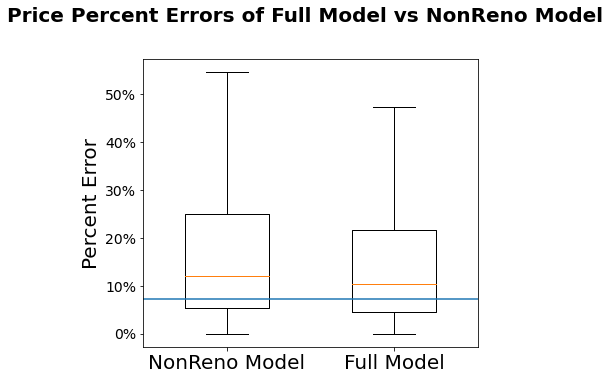

In [22]:
errors_1 = df_full_test_predicted["AbsPercError"]*100
errors_2 = df_nonreno_test_predicted["AbsPercError"]*100
model_name_1 = "Full Model"
model_name_2 = "NonReno Model"
title_text = 'Price Percent Errors of ' + model_name_1 +' vs '+ model_name_2
plot_error_comparisons(errors_1, errors_2, title_text, model_name_1, model_name_2, percentile = 1)


 Errors 1 described:
        AbsDollarError
count    5.909600e+04
mean     4.510062e+06
std      7.680987e+06
min      1.155000e+02
25%      1.174198e+06
50%      2.671382e+06
75%      5.284212e+06
max      4.070394e+08

Errors 2 described:
        AbsDollarError
count    3.822600e+04
mean     4.408311e+06
std      6.981001e+06
min      1.889167e+02
25%      1.184157e+06
50%      2.718226e+06
75%      5.278463e+06
max      2.084095e+08 



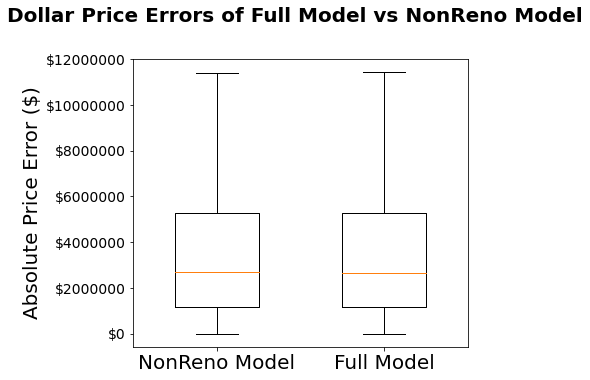

In [23]:
errors_1 = df_full_test_predicted["AbsDollarError"]*100
errors_2 = df_nonreno_test_predicted["AbsDollarError"]*100
model_name_1 = "Full Model"
model_name_2 = "NonReno Model"
title_text = 'Dollar Price Errors of ' + model_name_1 +' vs '+ model_name_2
plot_error_comparisons(errors_1, errors_2, title_text, model_name_1, model_name_2, percentile = 0)

***
### E. Experimental Code
(Goal: Estimate Variable Weights using Price/Median Price as Y Var) 


### E1. Determine type, year, tract specific median ARV and median ARV Errors

### E2. Export 2020_SFR_ARV and 2020_TH_ARV data for Tableau

### E3. Determine SFR Variable Weights (Random Forest)

### E4. Determine TH Variable Weights (Random Forest)

### E5. Determine SFR Variable Weights (Linear Model)

### E6. Determine TH Variable Weights (Linear Model)

### E7. Zero Shot Classifier Experiment

***
### Z. Notes on Findings and Future Ideas

In [ ]:
# Ideas for Boscas: 
# ML on Full data set to determine weights for each feature.
# ARV value for every for sale property on his website. 
# Tableau map of census data, sold property data, on a tableau map to the tract level for targetting neighborhoods for marketing campaigns. Need metric ideas of good market to target from Boscas - I suspect high number of solds in affluent tracts. 

In [ ]:
# Why Zillows error rate is bs:
#https://sacramentoappraisalblog.com/2019/05/01/two-things-to-understand-about-zillows-accuracy-rate/

## Scrap

#### Model Evaluation: 
 Our data classes are quite unbalanced (20% of the properties are renovated, 80% are not). Applying a 0 to the Renovation status for all entries would yield an accuracy of 80% but yield a useless model. While accuracy is a great metric to use when the class distribution is roughly even, the F1score is the go to metric for unbalanced classes. The F1score is the harmonic mean of Precision (measure of correct positive cases from all predicted positive cases) and Recall (measure of correct positive cases from all actual positive cases). Our Machine Learning Models will be evaluated primarily based on their F1score. Time to run will also be taken into consideration as a secondary criteria.
![title](https://www.gstatic.com/education/formulas2/-1/en/f1_score.svg)


Best performing Machine Learning Model: Accuracy, time, F1score
1. Linear SVC:          
    (0.858) (1min 38s)   (0.956)
2. Logistic Regression:       
    (0.859) (2min 54 s)     (0.956)    
3. Random Forest Classifier:  
    (0.836) (1min 59s) (0.951)
4. Extra Tre

The LinearSVC model stood out above the rest as the best performing model, boasting the top F1score, the second quickest run time, and the best accuracy. The Logistic Regression and the Voting Classifier models were just a hair behind the Linear SVC, however I should note that the Voting Classifier took over 5x times as long as the Linear SVC. Rounding out the rear is the Random Forest Classifier and the MultinomialNB. It is expected that the MultinomoialNB (Naive Bayes) model would be the poorest performer because of its unrealistic assumption that the set of predictors are completely independent. Interestingly, the MultinomialNB model performed best when the number of ngrams were set to 2 (ngram_range = (2,2)) and no stopwords filter was used. The Random Forest Classifier performed nearly as poor as the multinomialNB while also taking much longer to run. 

sources: 
<br>https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2
<br>https://www.gstatic.com/education/formulas2/-1/en/f1_score.svg

Why Zillows error rate is bs:
https://sacramentoappraisalblog.com/2019/05/01/two-things-to-understand-about-zillows-accuracy-rate/



#### Scaling and adding extra features to tfidf:
If the distribution of the data features are normal, then it should be standardized, otherwise, the data should be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001). It may be desirable to normalize data after it has been standardized if you have both standardized and normalized variables (try both scalers on top of each other).
<br> source of scaling instruction: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

TFIDF terms are stored in a sparse matrix, restricting ability to scale them. All existing scaling options used (MaxAbsScaler, StandardScaler without mean=0, and Normalizer) on the sparse tfidf matrix resulted in nearly identical or poorer prediction results. In retrospect, I suspect that this is because the TfidfVectorizer() function is the combination of the CountVectorizer() and the TfidfTransfromer() functions where the TfidfTransformer() function essentially acts as the scaler function on CountVectorizer(), making additional scaling redundant at best. 

Merging and scaling additional features from the dataset into the tfidf features typically had virtually no impact on any of the models. The only model results that saw significant improvement were the random forest model results which saw accuracy increase from 0.943 to 0.946 and F1score increase from 0.827 to 0.836. However, these improvements were not enough to supercede the non-merged feature results from either the Logistic Regression model (accuracy of 0.951 and F1score or 0.857) or the Linear SVM model (accuracy of 0.953 and F1score of 0.860). Update: 'StandardSale', 'ClosePrice',and 'DaysOnMarket' features slightly improved accuracy and f1Score on all models but MultinomialNB. 

Splitting the TfidfVectorizer into CountVectorizer() and TfidfTransformer() with the same parameters results in virtually identical results. Using .fit() on a pipeline with TfidfVectorizer forwards the .fit() into TfidfVectorizer and using .predict() is forwarded as a .transform() for the TfidfVectorizer().  Therefore there is no point beyond using additional code beyond the TfidfVectorizer function. However, I will be keeping the TfidfVectorizer function outside of the Pipeline in case I discover or generate new meaningful features I wish to merge the the tfidf sparse matrix in the future. Below was the code that used the CountVectorizer() + TfidfTransformer() functions instead of TfidfVectorizer(). 

        # X_train Fit_Transform
        _cv_train = customized_CV
        _idfTran = TfidfTransformer()
        _X_train = _cv_train.fit_transform(_Xdocs.loc[train_index, 'PublicRemarks'])
        _X_train = _idfTran.fit_transform(_X_train)

        ## X_test fit_transform on CountVectorizer, but only transform from existing TfidfTransformer
        _cv_test = customized_CV
        _X_test = _cv_train.transform(_Xdocs.loc[test_index, 'PublicRemarks'])
        _X_test = _idfTran.transform(_X_test)

Note that 'lr' is an acronym for "living room"

#### CalibratedClassifierCV
Some models had a very distorted balance between FP and FN (especially SGD). The CalibratedClassifier corrects this imbalance by fitting the data k=5 times
Code for building pre and post calibration plots is available here: https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/
SOLUTION TO  CALIBRATION + CHARTS PROBLEM: https://stackoverflow.com/questions/59194231/attributeerror-calibratedclassifiercv-object-has-no-attribute-coef

Binary Classification Metrics compared: https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc#1

#### ROC AUC
An ROC curve (or receiver operating characteristic curve) is a plot that summarizes the performance of a binary classification model on the positive class. A trade-off exists between the TruePositiveRate and FalsePositiveRate, such that changing the threshold of classification will change the balance of predictions towards improving the TruePositiveRate at the expense of FalsePositiveRate, or the reverse case.  One might choose a threshold in order to bias the predictive behavior of a classification model. The curve provides a convenient diagnostic tool to investigate one classifier with different threshold values and the effect on the TruePositiveRate and FalsePositiveRate. By evaluating the true positive and false positives for different threshold values, a curve can be constructed that stretches from the bottom left to top right and bows toward the top left. ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds. While the ROC curve is a helpful diagnostic tool, in practice it is easier to calculate the area under the curve as a single score (roc_auc) using the roc_auc_score() function. This score can easily be compared against the roc_auc score of other models.

The ROC curve is a useful tool for a few reasons:
The curves of different models can be compared directly in general or for different thresholds.
The area under the curve (AUC) can be used as a summary of the model skill. The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

To make this clear:

Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

Recall == Sensitivity == True Positive Rate
Recall = True Positives / (True Positives + False Negatives)
Sensitivity = True Positives / (True Positives + False Negatives)
True Positive Rate = True Positives / (True Positives + False Negatives)

False Positive Rate == 1 - Specificity
False Positive Rate = False Positives / (True Negatives + False Positives)
1 - Specificity = 1 - True Negatives / (True Negatives + False Positives)
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/#:~:text=The%20decision%20for%20converting%20a,in%20the%20range%20between%200



#### Precision-Recall Curves
While ROC curves are appropriate when the observations are roughly balanced between each class, precision-recall curves are more appropriate for imbalanced datasets. Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds between positive and negative classes. Scores are calculated for each row and compared to the threshold (which is 0.500 by default). A row with a score higher than this threshold is predicted to be a member of the positive class and vica-versa. However, it may be useful to tune this threshold parameter from 0.500 to another number, especially for imbalanced classes. The Precision-Recall curves are a visual tool for determining what this optimal threshold would be. 

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
ROC curves present an optimistic picture of the model on datasets with a class imbalance. The technical reason for this optimistic picture is because of the use of true negatives in the False Positive Rate in the ROC Curve and the careful avoidance of this rate in the Precision-Recall curve. In other words, the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly, e.g. high true negatives. The Precision-Recall AUC is just like the ROC AUC, in that it summarizes the curve with a range of threshold values as a single score. The score can then be used as a point of comparison between different models on a binary classification problem where a score of 1.0 represents a model with perfect skill.

Why we typically shouldn't use Roc curves as a general rule: Most real world data sets have imbalanced classes + "Some go further and suggest that using a ROC curve with an imbalanced dataset might be deceptive and lead to incorrect interpretations of the model skill."

Key to the calculation of precision and recall is that the calculations do not make use of the true negatives. It is only concerned with the correct prediction of the minority class, class 1.

Precision = Positive Predictive Power
Precision = True Positives / (True Positives + False Positives)
Positive Predictive Power = True Positives / (True Positives + False Positives)



#### Acc and F1 scores with new scaled variables added and nans delt with by dropping vs filling in with 0s.
Acc	F1
Default	0.956	0.856
		
Default (dropped nans from tract_ScaledPrice)	0.954	0.852
<br>added tract_ScaledPrice. (dropped nans)	0.956	0.858
<br>tract_ScaledPrice (fill  tract_ScaledPrice nans with 0)	0.956	0.858
		
Default (dropped nans from tract_ScaledPricePerSqft)	0.953	0.852
<br>added tract_ScaledPricePerSqft. (dropped nans)	0.954	0.855
<br>tract_ScaledPricePerSqft (fill  tract_ScaledPricePerSqft nans with 0)	0.956	0.856
		
added both scaled variables, filled nans with 0s. 	0.956	0.857	
		
Useless: Count_TypeYearTract, PricePerSqft		
Maybe: tract_ScaledPricePerSqft,  tract_ScaledPrice,		


### Future Ideas
Code to tune many hyperparameters at once: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/¶

Tuning many hyperparameters at once inside of a pipeline: https://medium.com/@kocur4d/hyper-parameter-tuning-with-pipelines-5310aff069d6

Create new "mergedRemarks" column that adds text from other columns like InteriorFeatures. 
realMaxYear = max(YearBuilt, EffectiveYear)

## Redfin backup data plan. 
##### Fields:
* BEDS (Yes)
* BATHS (Yes)
* SQUARE FEET (Yes - but inaccurate)
* LOT SIZE (Yes)
* YEAR BUILT (Yes)
* HOA/MONTH (Yes)

Note: Use living Sqft instead of Above Grade Sqft. Might reduce need to ask questions about basement. 

##### Important Missing Features from Redfin data set: 
* Tax Assessment Amount
* Garage Spaces
* Brick,Stone
* Public Water (? default to 1?)
* Deck 
* Basement and/or Finished Basement and/or Unfinished Basement
* Patio
* Do something with SFR Rambler, SFR Colonial, and unfinished SFR Levels variable. TH End unit too. 
* Porch


* Replace (both) intermediate save, load, pd.to_numeric conversion codes with Pickle
* Modularize into seperated TH, SFR data sets.
* Implement a Levels_custom into a scaled variable to fill in nans. 
    levelsMap = {'1':1, '3+':3, '2':2, '':np.nan, 'Other':np.nan, '1.5':1.5, '3':3, '2.5':2,5, '4':4, '3.5':3.5, '5':5,
           '4.5':4.5, '3,3':3, '6':6 }